## Final Project Submission

Please fill out:
* Student name: Wesley Yu
* Student pace: Flex
* Scheduled project review date/time: September 12, 2022 / 12:30 PM
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://medium.com/@to.wesleyyu/predicting-pump-functionality-of-water-points-in-tanzania-87c8889fcb25

# Tanzanian Water Well Analysis

**Authors:** Wesley Yu
***

## Overview

This project will use machine learning techniques to predict functionality of waterpoints in Tanzania.

## Business Problem

The Tanzanian government has set aside a budget to repair non functional water wells. They would like a method to predict the functionality of water wells so that resources can be allocated for repairs. They would also like to know what factors lead to a waterpoint being non functional, so that newly installed waterpoints will have better chances of performing as needed.

## Data Understanding

Data set taken from a Driven Data competition containing around 60,000 records of water points  in Tanzania. Each record contains various information of the water points such as, type of pump, location, management, water source, and water quality as well as the functionality of the water point.

Link to competition page: [Pump it Up: Data Mining the Water Table](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/)

## Data Exploration

### EDA 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt       

In [2]:
X = pd.read_csv('Data/train_values.csv')
X.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
y = pd.read_csv('Data/train_labels.csv')
y.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
data = X.merge(y, on = 'id')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [6]:
data.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [7]:
data.duplicated().sum()

0

In [8]:
data.status_group.value_counts(normalize = True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [9]:
data.loc[data.status_group == 'functional needs repair', 'status_group'] = 'functional'

We will focus on providing immediate help to people without clean water. Non functional wells will be prioritized first. Functional wells in need of repair will be group with functional wells.

In [10]:
data.status_group.value_counts(normalize = True)

functional        0.615758
non functional    0.384242
Name: status_group, dtype: float64

Based on feature description of the data set from the competition, there may be features that may contain the same information. There is also a class imbalance, 38% are non functional, and 61% are functional.

In [11]:
data.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

#### Examining similar features

Description of features show several features that may contain the same information.

* scheme_management - Who operates the waterpoint
* scheme_name - Who operates the waterpoint
* management - How the waterpoint is managed
* management_group - How the waterpoint is managed

In [12]:
data.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [13]:
data.scheme_name.value_counts()

K                            682
None                         644
Borehole                     546
Chalinze wate                405
M                            400
                            ... 
Kigonigoni water supply        1
Nameqhuwadiba                  1
Mradi wa maji wa Maposeni      1
Kasahunga pipe scheme          1
Ikungi                         1
Name: scheme_name, Length: 2696, dtype: int64

In [14]:
data.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

scheme_name has a high amount unique values with low occurrence and also contains 28166 null values, this feature can be dropped. scheme_management contains similar values as management feature but contains 3877 null values. We can drop scheme_management in favor of management feature.

In [15]:
data.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [16]:
data.groupby(['management_group', 'management'])['status_group'].count()

management_group  management      
commercial        company               685
                  private operator     1971
                  trust                  78
                  water authority       904
other             other                 844
                  other - school         99
parastatal        parastatal           1768
unknown           unknown               561
user-group        vwc                 40507
                  water board          2933
                  wua                  2535
                  wug                  6515
Name: status_group, dtype: int64

management_group feature seems to be aggregate of management feature. We will drop management_group as subgroups show different ratios of function and non functional wells.

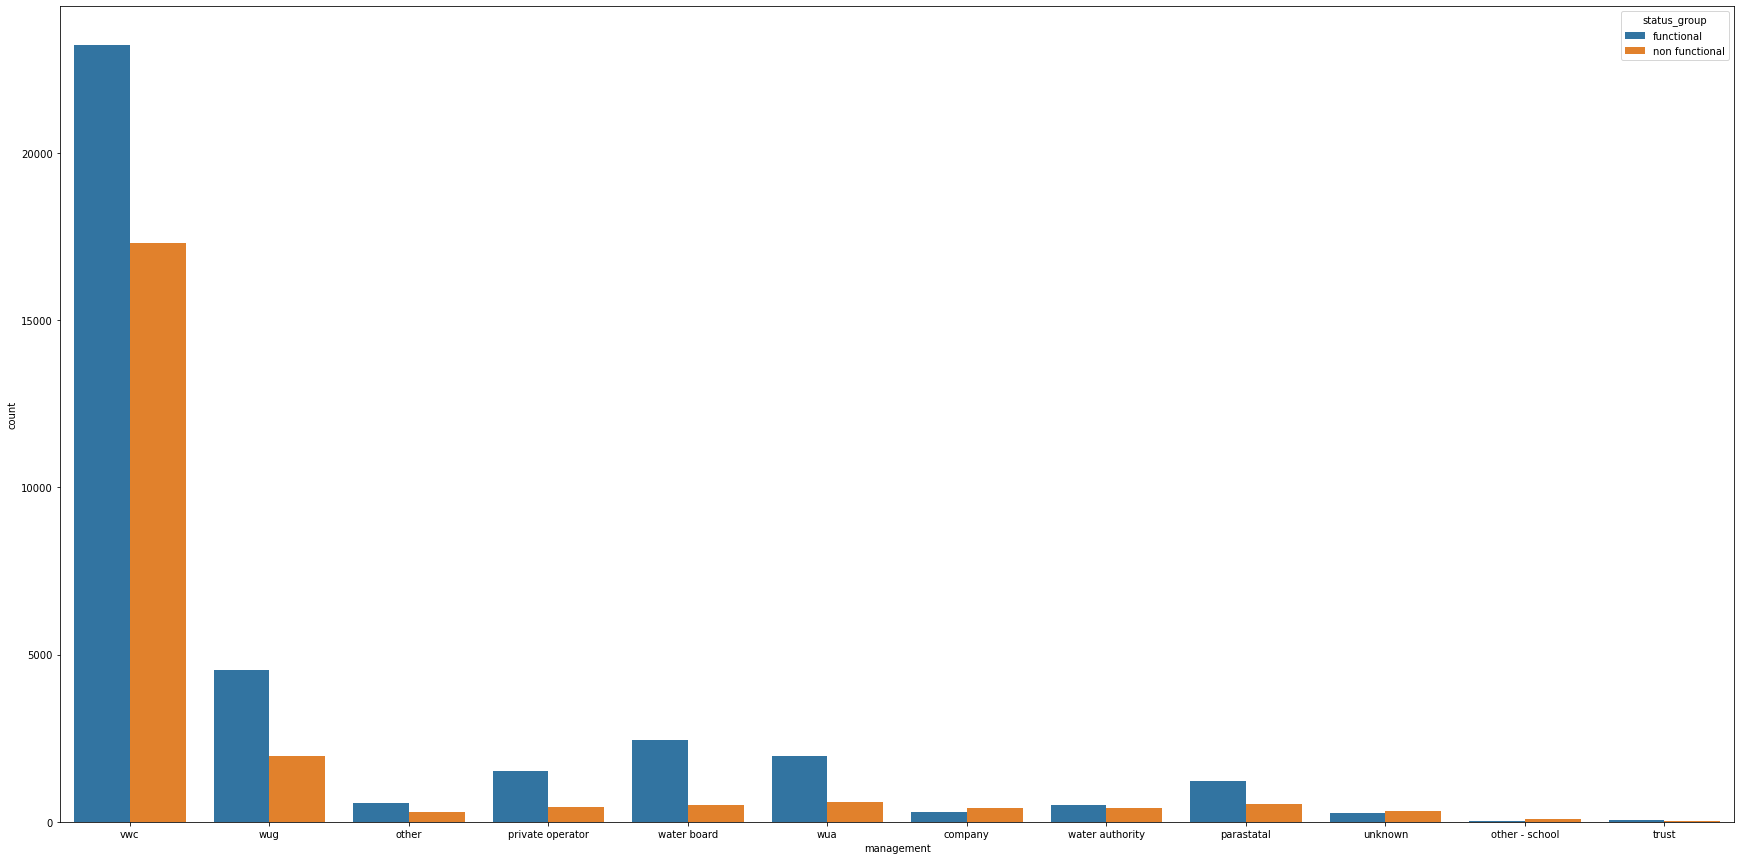

In [17]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x = 'management', hue = 'status_group', data = data)

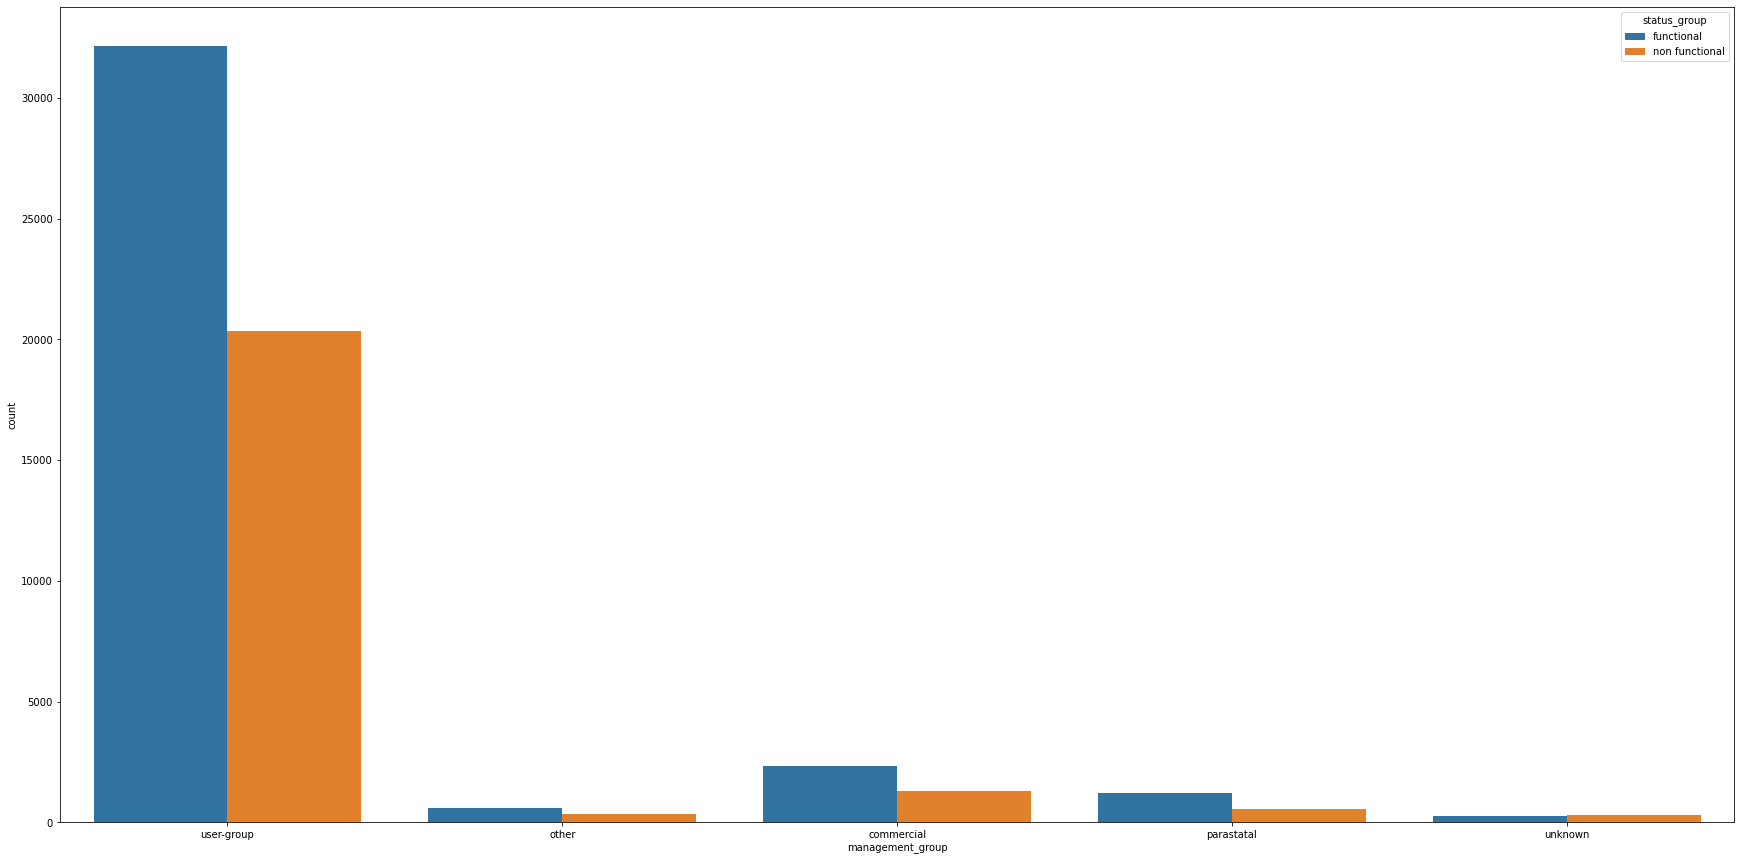

In [18]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x = 'management_group', hue = 'status_group', data = data)

In [19]:
# creating list of features to drop
to_drop = ['scheme_management', 'scheme_name', 'management_group']

Extraction features shows values are similar.

* extraction_type - The kind of extraction the waterpoint uses
* extraction_type_group - The kind of extraction the waterpoint uses
* extraction_type_class - The kind of extraction the waterpoint uses

In [20]:
data.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [21]:
data.extraction_type_group.value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [22]:
data.extraction_type_class.value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [23]:
data.groupby(['extraction_type_class','extraction_type_group', 'extraction_type'])['status_group'].count()

extraction_type_class  extraction_type_group  extraction_type          
gravity                gravity                gravity                      26780
handpump               afridev                afridev                       1770
                       india mark ii          india mark ii                 2400
                       india mark iii         india mark iii                  98
                       nira/tanira            nira/tanira                   8154
                       other handpump         other - mkulima/shinyanga        2
                                              other - play pump               85
                                              other - swn 81                 229
                                              walimi                          48
                       swn 80                 swn 80                        3670
motorpump              mono                   mono                          2865
                       other motorpum

We will keep only extraction_type_group, due to many sub groups from extraction_type having few occurrences.

In [24]:
# adding deatures to drop list
to_drop.extend(['extraction_type', 'extraction_type_class'])

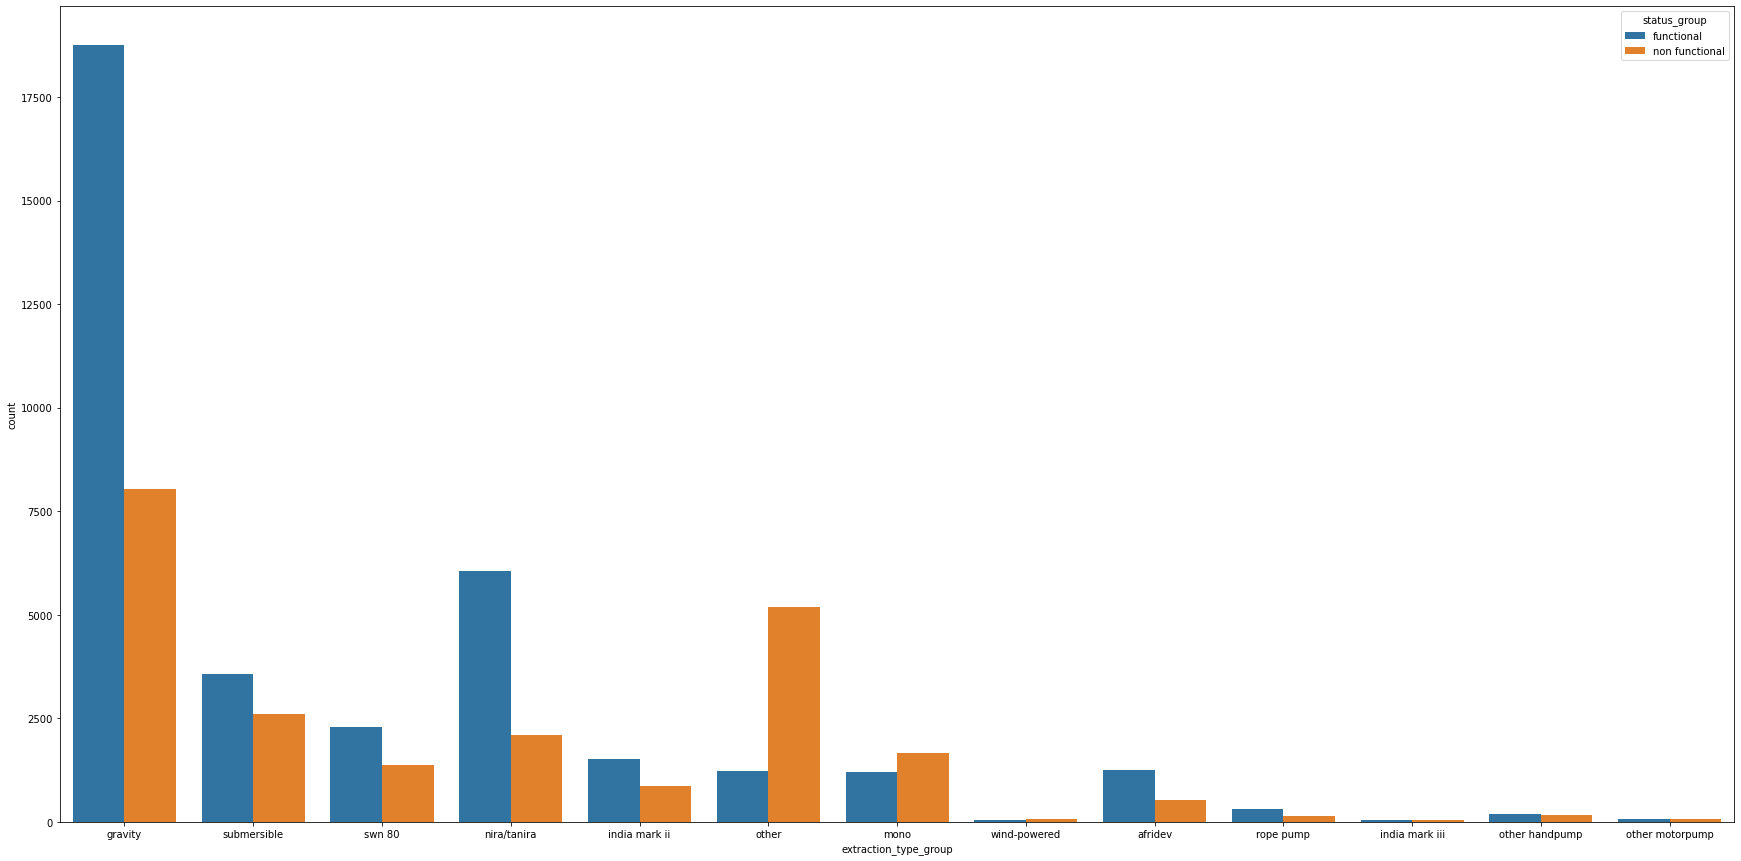

In [25]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x = 'extraction_type_group', hue = 'status_group', data = data)

Payment features contain same values, one of these can be dropped.

* payment - What the water costs
* payment_type - What the water costs

In [26]:
data.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [27]:
data.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

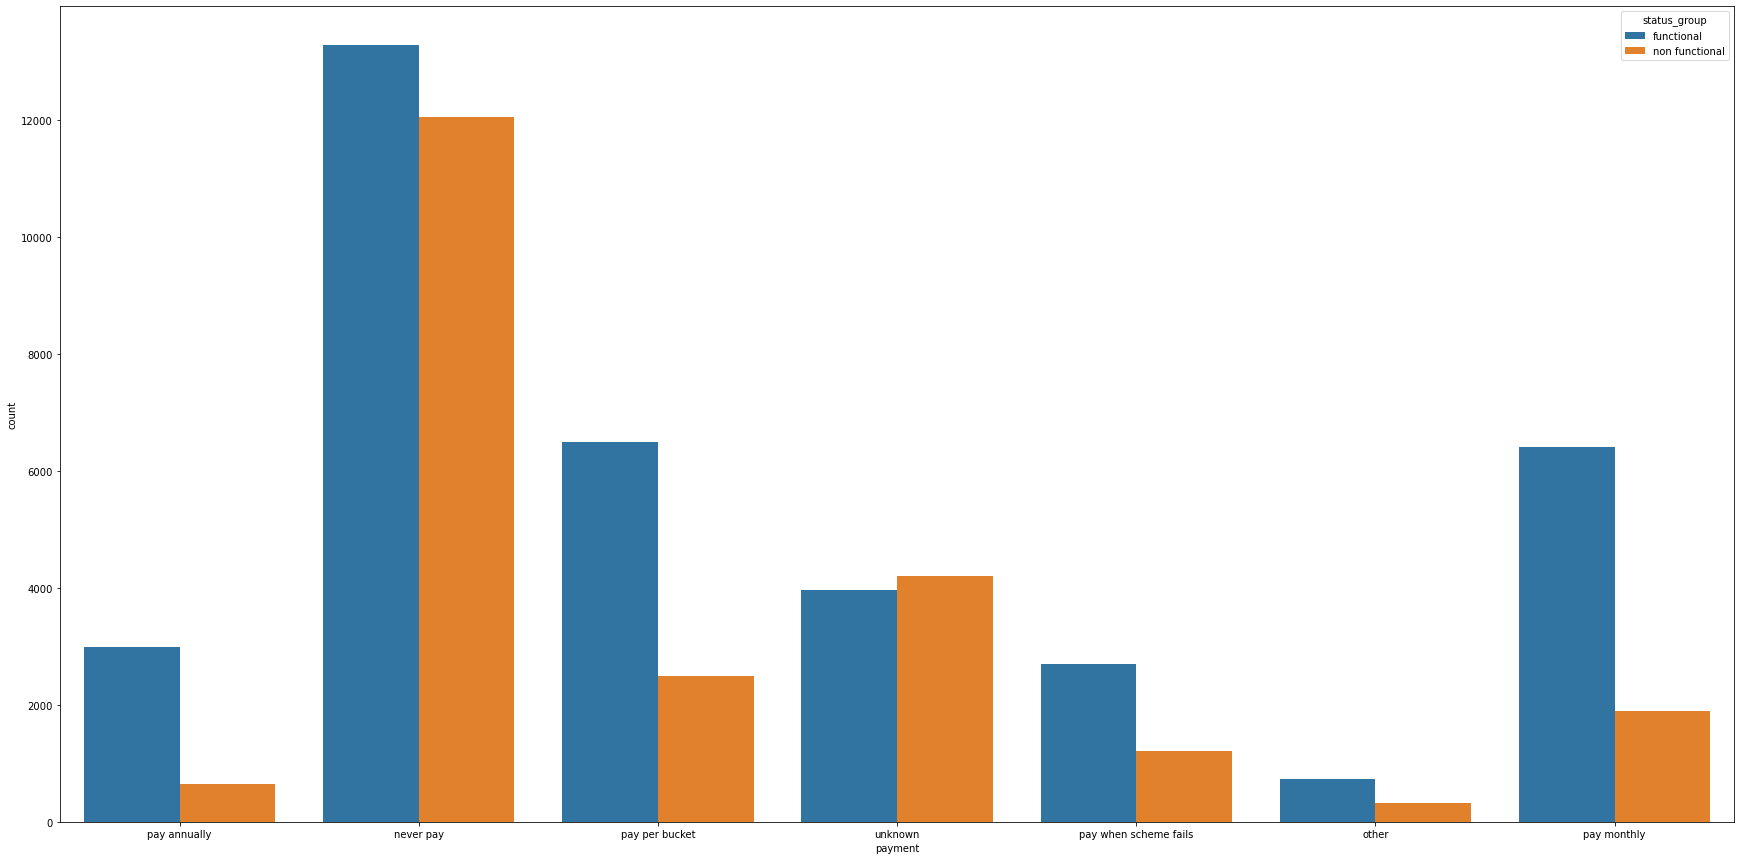

In [28]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x = 'payment', hue = 'status_group', data = data)

In [29]:
to_drop.append('payment_type')

Water quality features also contain same values. water_quality has two additional values listed as abandoned, but due to low occurrence, we will drop this feature in favor of quality_group.

* water_quality - The quality of the water
* quality_group - The quality of the water

In [30]:
data.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [31]:
data.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

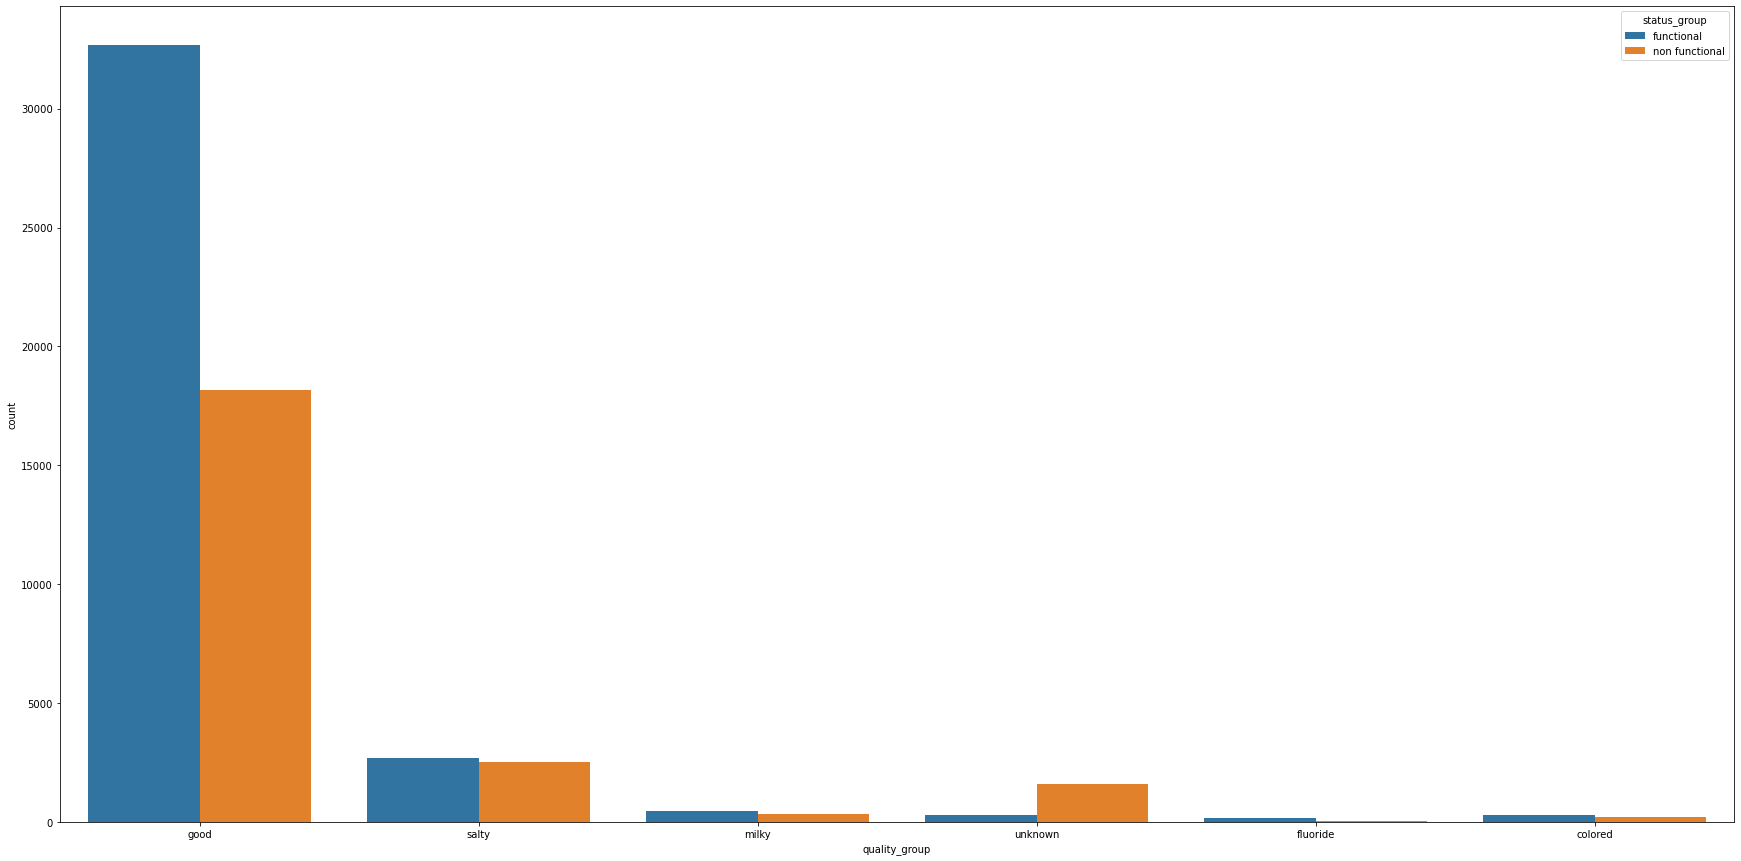

In [32]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x = 'quality_group', hue = 'status_group', data = data)

In [33]:
to_drop.append('water_quality')

Quantity features contain the same values, one of these can be dropped.

* quantity - The quantity of water
* quantity_group - The quantity of water

In [34]:
data.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [35]:
data.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

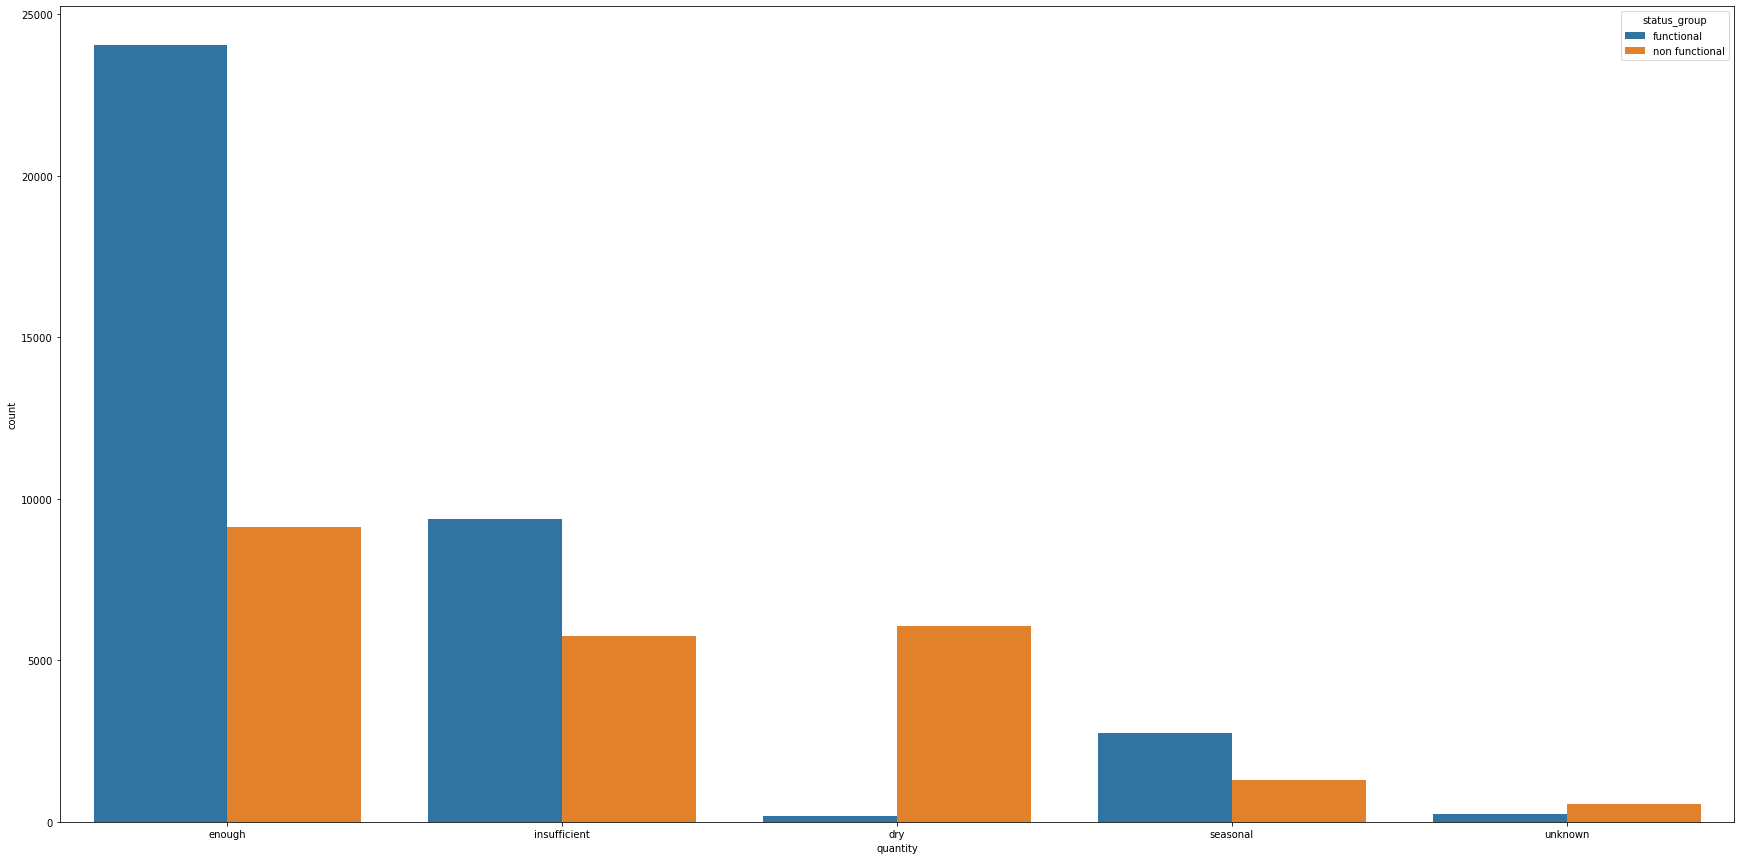

In [36]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x = 'quantity', hue = 'status_group', data = data)

In [37]:
to_drop.append('quantity_group')

Source features contain similar values. We will keep only source_type, as additional sub groups from source feature have low occurrence.

* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water

In [38]:
data.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [39]:
data.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [40]:
data.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [41]:
data.groupby(['source_class','source_type', 'source'])['status_group'].count()

source_class  source_type           source              
groundwater   borehole              hand dtw                  874
                                    machine dbh             11075
              shallow well          shallow well            16824
              spring                spring                  17021
surface       dam                   dam                       656
              rainwater harvesting  rainwater harvesting     2295
              river/lake            lake                      765
                                    river                    9612
unknown       other                 other                     212
                                    unknown                    66
Name: status_group, dtype: int64

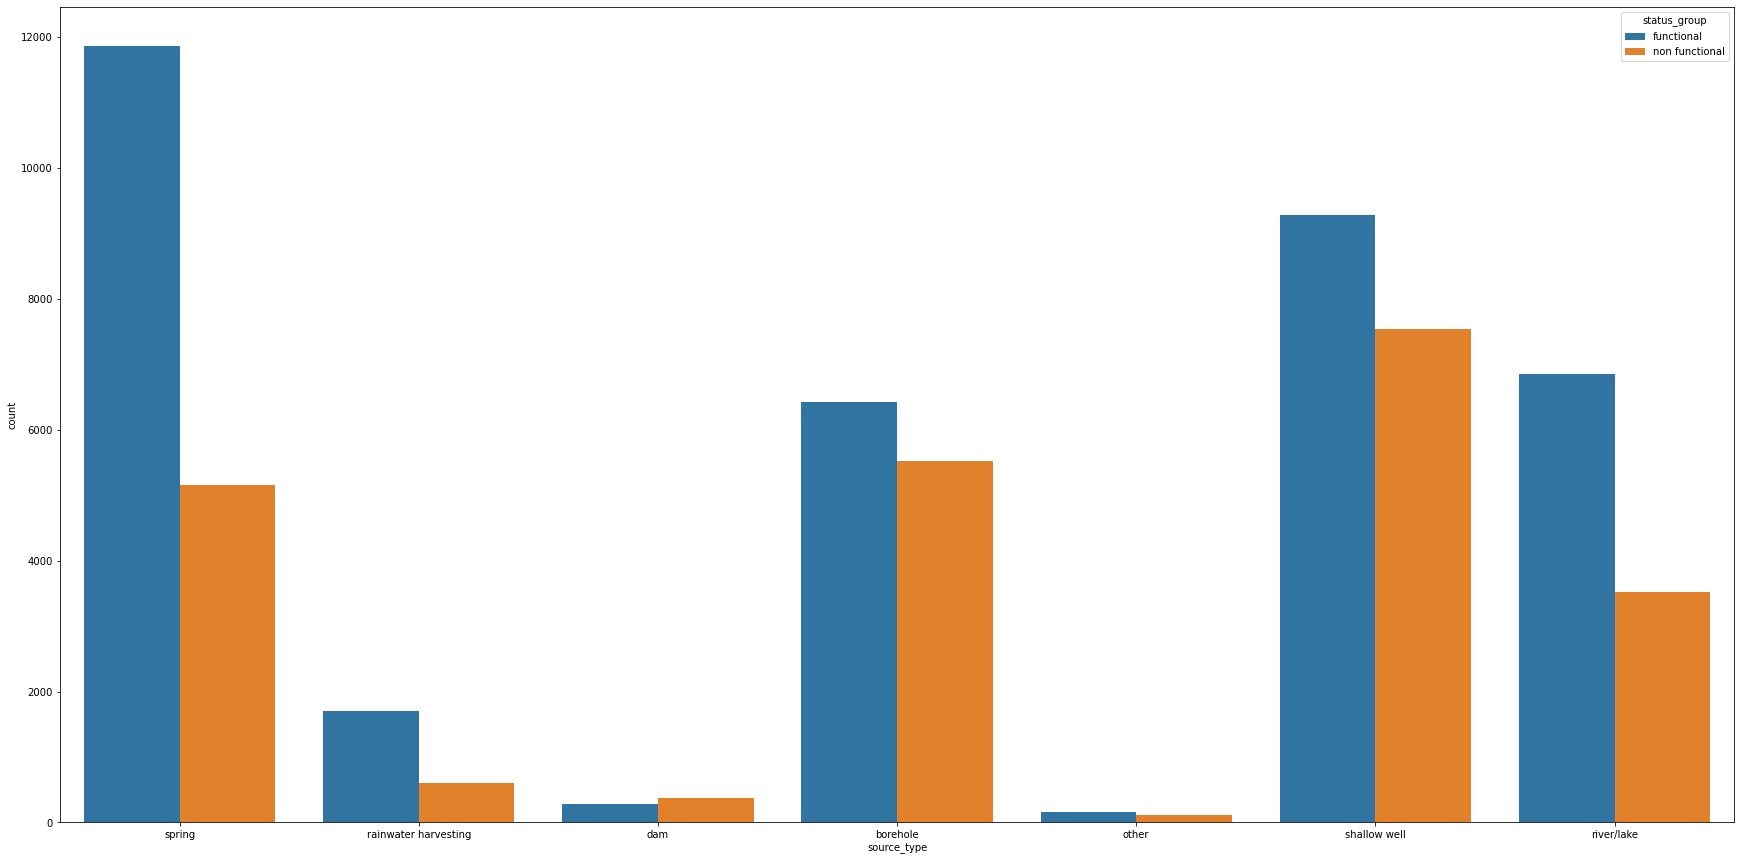

In [42]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x = 'source_type', hue = 'status_group', data = data)

In [43]:
to_drop.extend(['source', 'source_class'])

Waterpoint features are very similar. We will keep waterpoint_type due to data showing communal standpipe multiple having more non functional wells than functional.

* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint

In [44]:
data.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [45]:
data.waterpoint_type_group.value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

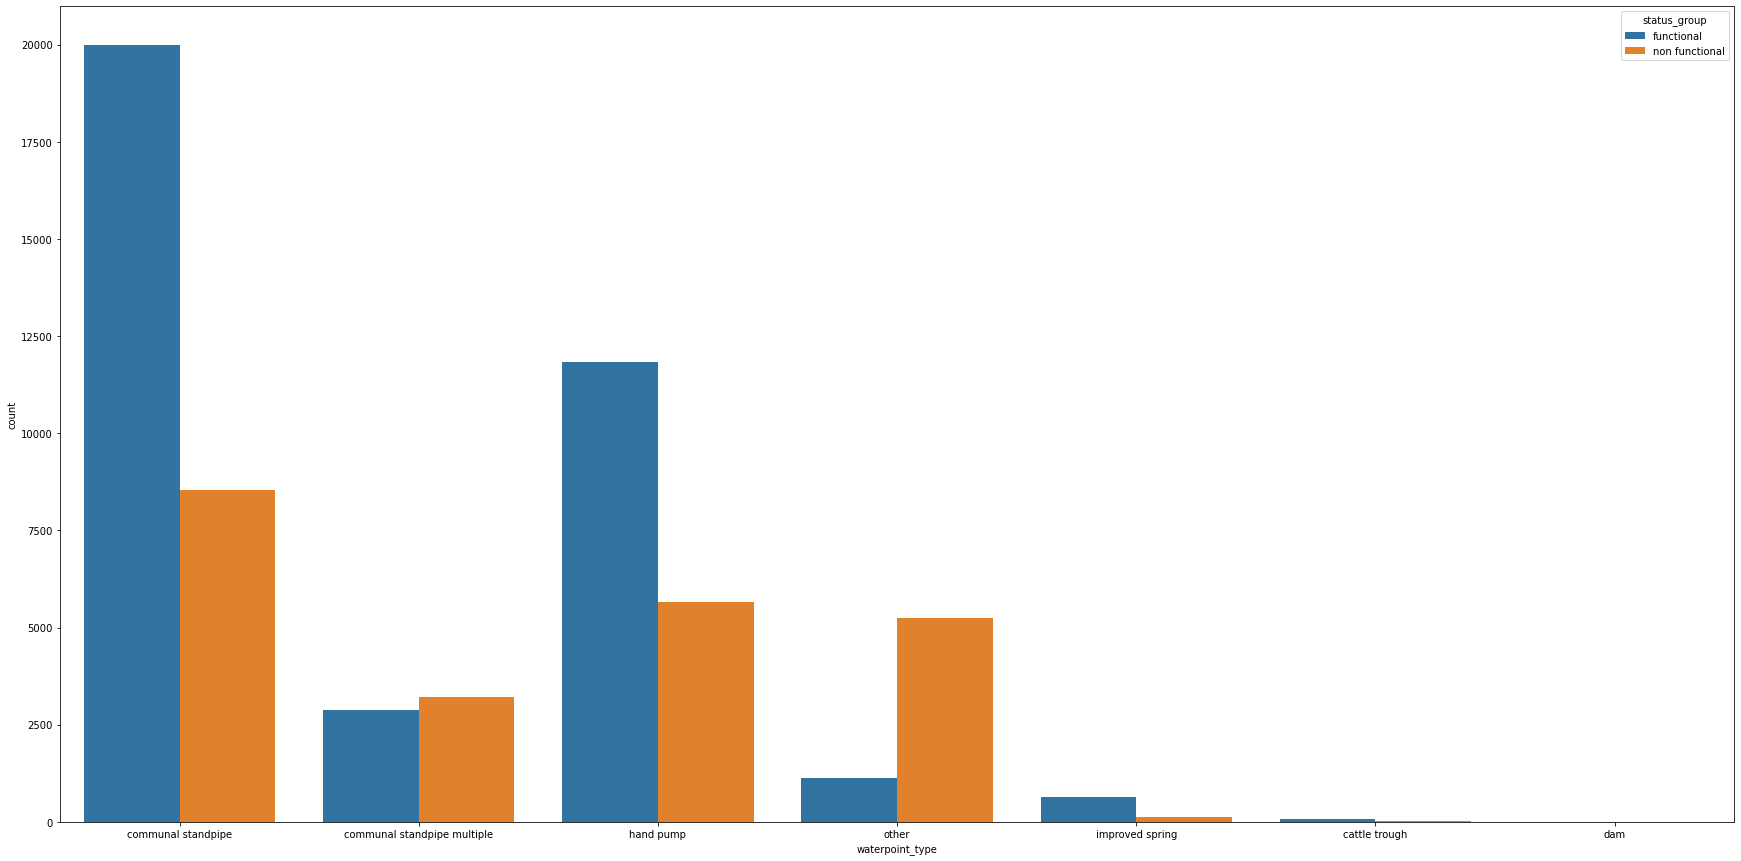

In [46]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x = 'waterpoint_type', hue = 'status_group', data = data)

In [47]:
to_drop.append('waterpoint_type_group')

Moving on to location features.

* subvillage - Geographic location
* region - Geographic location
* region_code - Geographic location (coded)
* district_code - Geographic location (coded)
* lga - Geographic location
* ward - Geographic location

In [48]:
data.subvillage.value_counts()

Madukani          508
Shuleni           506
Majengo           502
Kati              373
Mtakuja           262
                 ... 
Nyamajiva           1
Nachitalala         1
Emugurunanyoki      1
Wtskim              1
Nhombola            1
Name: subvillage, Length: 19287, dtype: int64

subvillage contains high number of unique values, this feature will be dropped.

In [49]:
data.region.value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

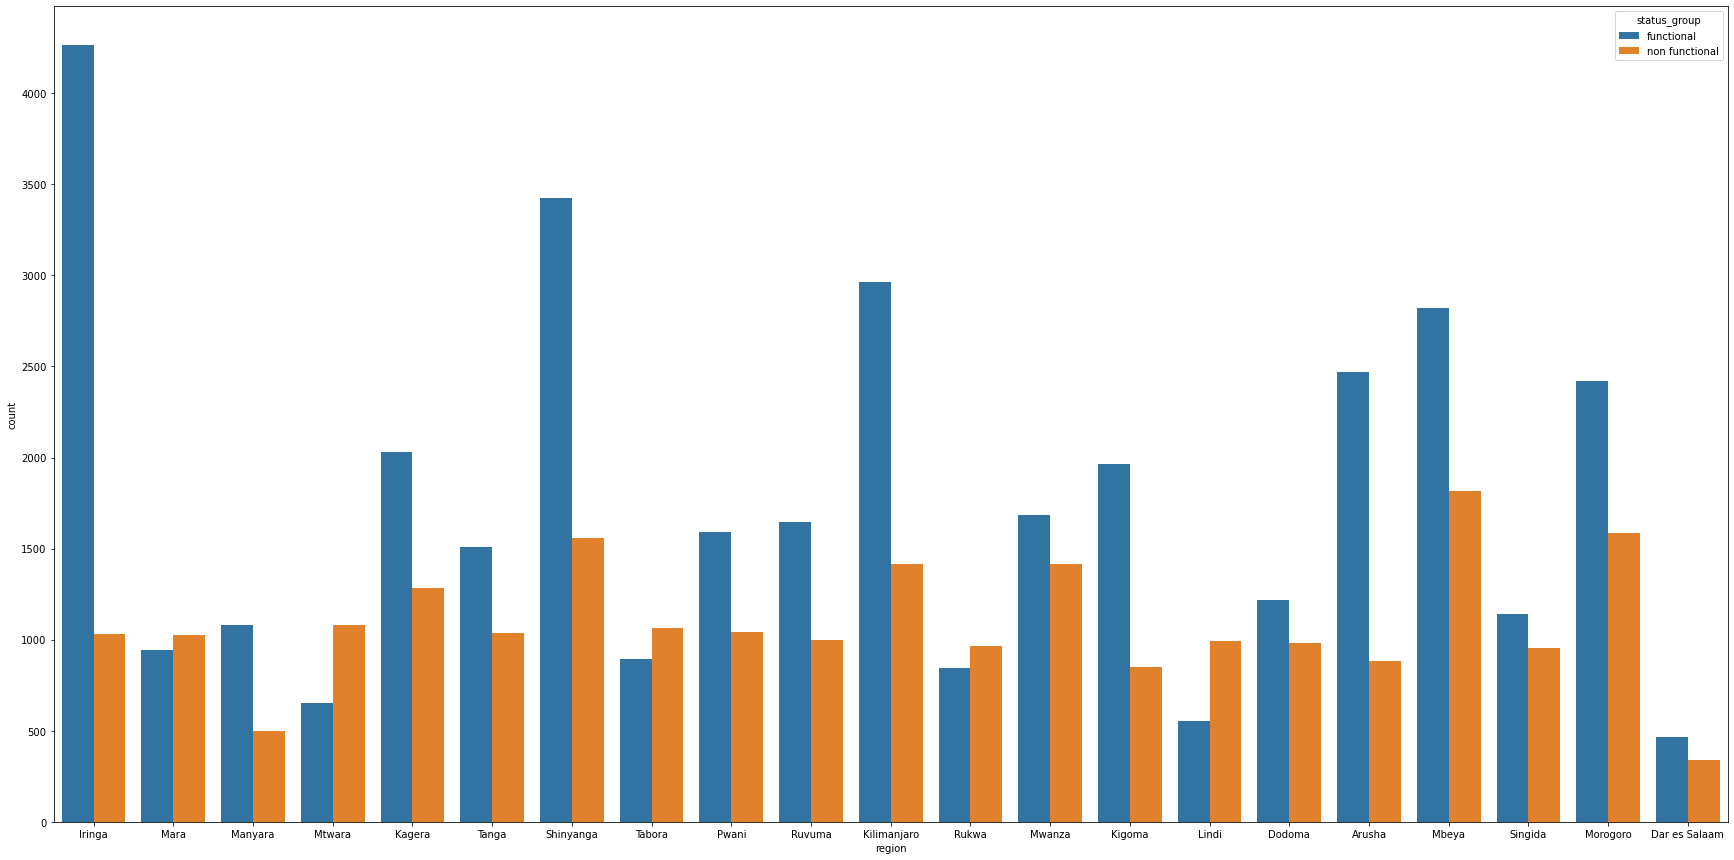

In [50]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x = 'region', hue = 'status_group', data = data)

In [51]:
data.groupby(['region', 'region_code'])['status_group'].count()

region         region_code
Arusha         2              3024
               24              326
Dar es Salaam  7               805
Dodoma         1              2201
Iringa         11             5294
Kagera         18             3316
Kigoma         16             2816
Kilimanjaro    3              4379
Lindi          8               300
               18                8
               80             1238
Manyara        21             1583
Mara           20             1969
Mbeya          12             4639
Morogoro       5              4006
Mtwara         9               390
               90              917
               99              423
Mwanza         17               55
               19             3047
Pwani          6              1609
               40                1
               60             1025
Rukwa          15             1808
Ruvuma         10             2640
Shinyanga      11                6
               14               20
               17           

In [52]:
data.district_code.value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [53]:
data.groupby(['region', 'district_code'])['status_group'].count()

region  district_code
Arusha  1                 189
        2                1206
        3                 109
        5                 201
        6                 310
                         ... 
Tanga   4                 110
        5                 293
        6                 266
        7                 127
        8                 288
Name: status_group, Length: 132, dtype: int64

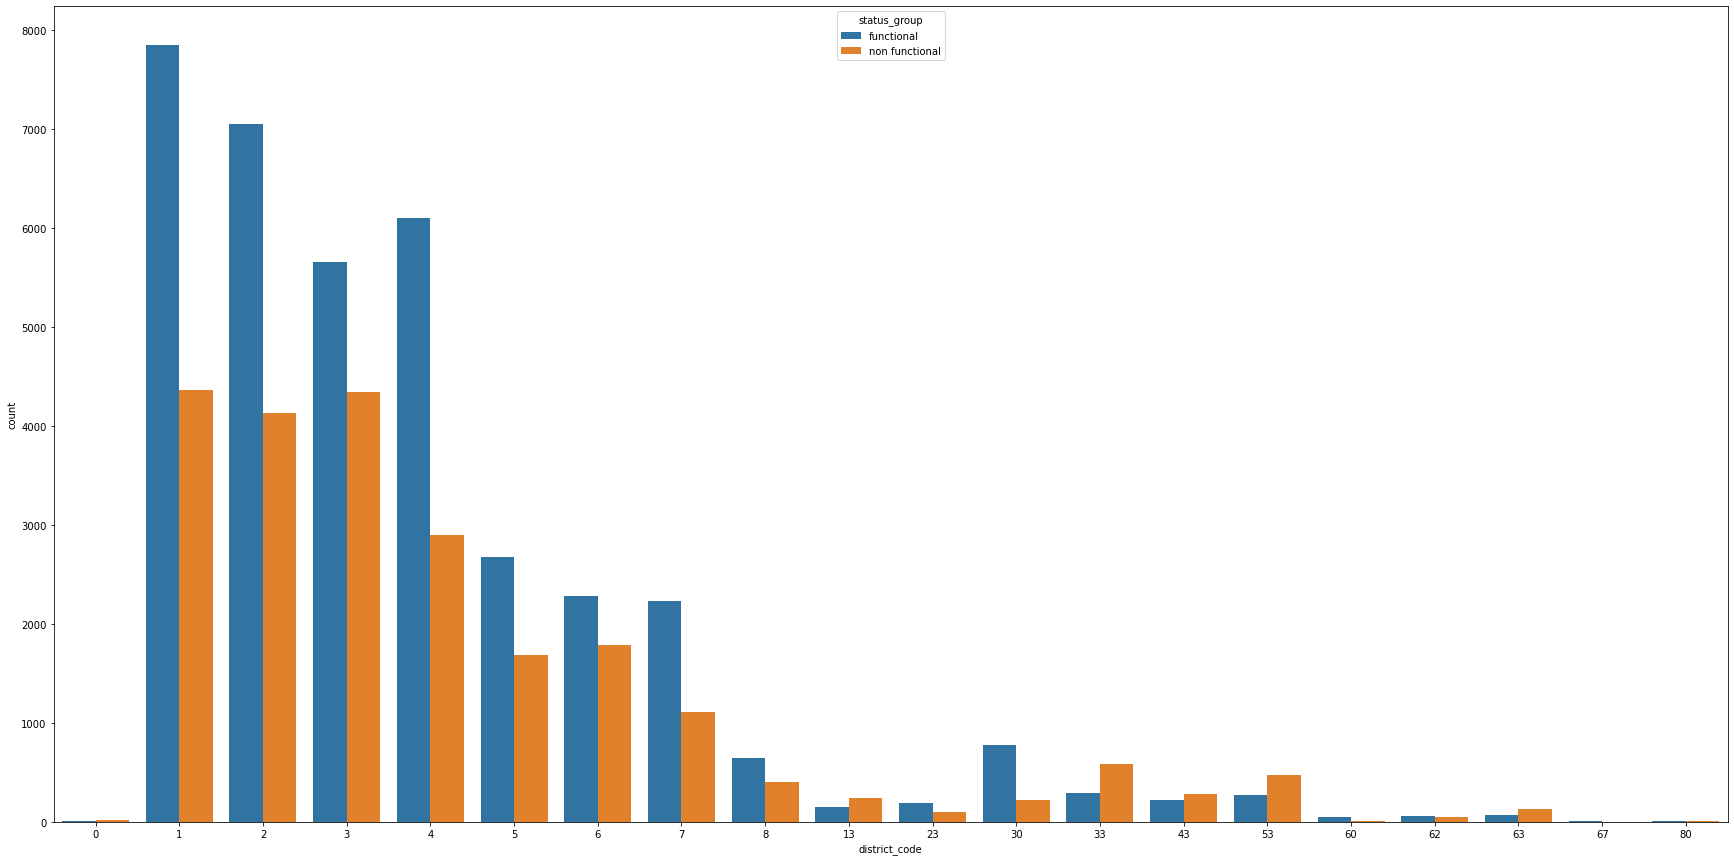

In [54]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x = 'district_code', hue = 'status_group', data = data)

In [55]:
data[data.district_code == 0]['region'].value_counts()

Dodoma    23
Name: region, dtype: int64

We are unsure of what values district_code represents. It seems to be a ranking of districts within a region (with 1 being highest rank). Various regions contain similar district_code values. Above graph does show as district_code increases there are more non functional wells compared to functional. 0 value may be represented as not recorded or unknown.

In [56]:
data.lga.value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [57]:
data.groupby(['region', 'lga'])['status_group'].count()

region  lga         
Arusha  Arusha Rural    1252
        Arusha Urban      63
        Karatu           326
        Longido          310
        Meru            1009
                        ... 
Tanga   Lushoto          694
        Mkinga           288
        Muheza           334
        Pangani          305
        Tanga             99
Name: status_group, Length: 125, dtype: int64

Based on a google search values in lga feature seem to be the districts within each region.

In [58]:
data.ward.value_counts()

Igosi            307
Imalinyi         252
Siha Kati        232
Mdandu           231
Nduruma          217
                ... 
Mitole             1
Kihangimahuka      1
Chinugulu          1
Matarawe           1
Kapilula           1
Name: ward, Length: 2092, dtype: int64

ward feature contains a high number of unique values with low occurrence.

From wikipedia "Tanzania is divided into thirty-one regions (mkoa in Swahili). Each region is subdivided into districts (wilaya in Swahili). The districts are sub-divided into divisions (tarafa in Swahili) and further into local wards (kata in Swahili)."
<br>
<br>
Out of the location features we will choose to keep lga and distict_code. 

In [59]:
to_drop.extend(['subvillage', 'region', 'region_code', 'ward'])

#### Examining other columns

Total static head feature contains around 70% of 0 values.

* amount_tsh - Total static head (amount water available to waterpoint)

In [60]:
data.amount_tsh.value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [61]:
data.amount_tsh.describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

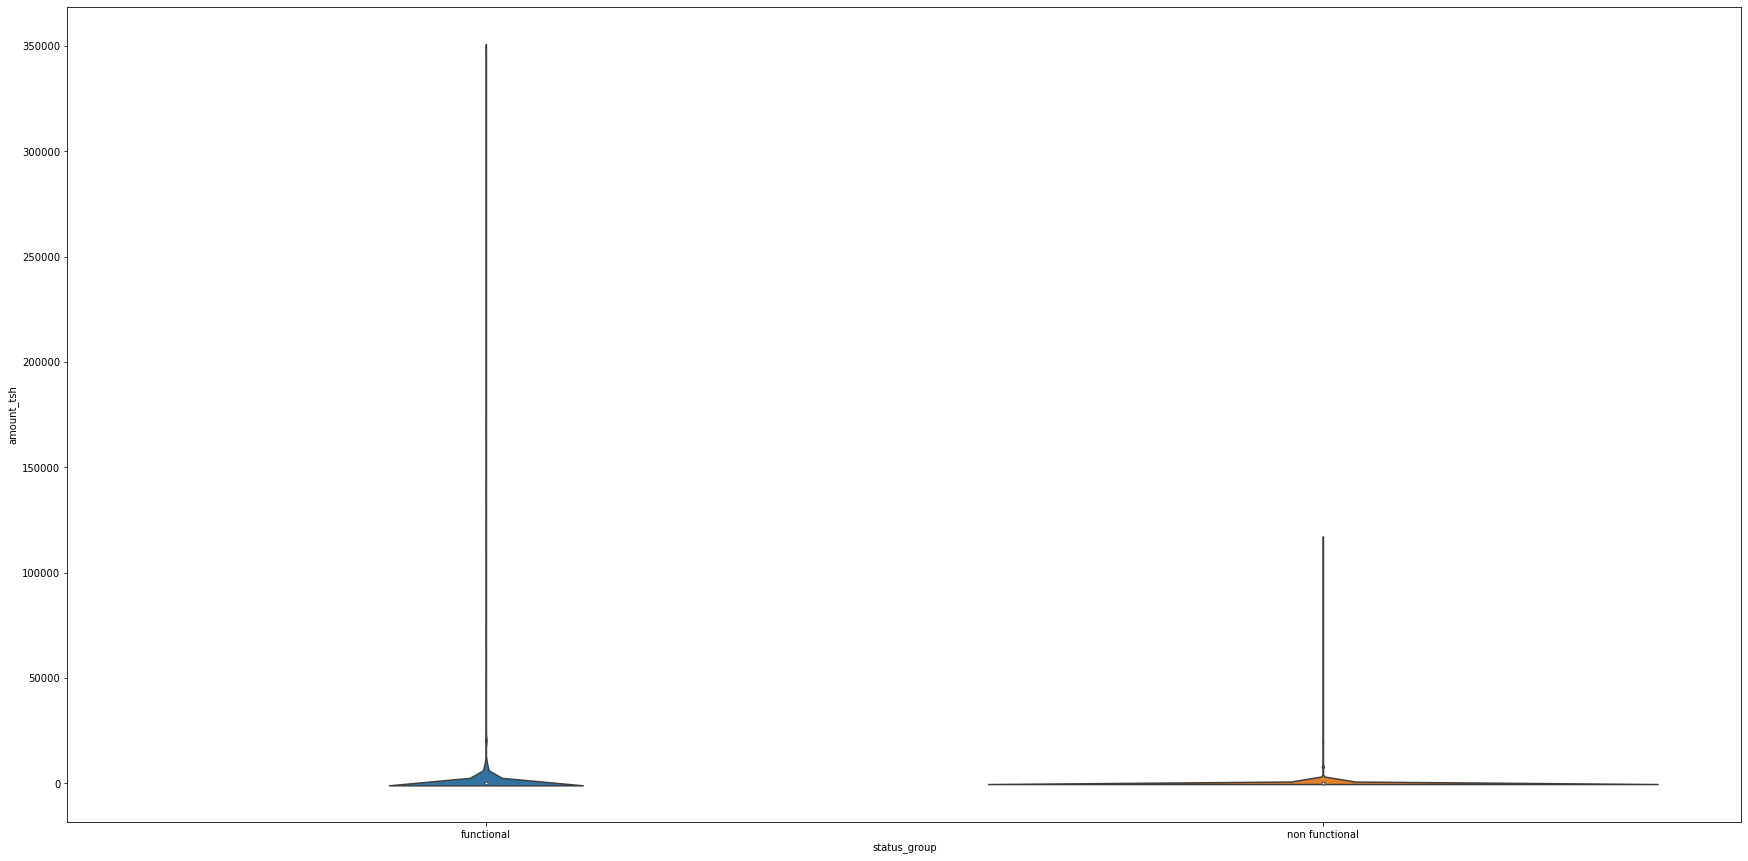

In [62]:
plt.figure(figsize=(30,15))
ax = sns.violinplot(x = 'status_group', y = 'amount_tsh', data = data);

In [63]:
data[data.amount_tsh == 0].groupby('status_group').count()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
status_group,,,,,,,,,,,,,,,,,,,,,
functional,22754,22754,22754,20661,22754,20645,22754,22754,22754,22754,...,22754,22754,22754,22754,22754,22754,22754,22754,22754,22754
non functional,18885,18885,18885,17697,18885,17698,18885,18885,18885,18885,...,18885,18885,18885,18885,18885,18885,18885,18885,18885,18885


In [64]:
data[data.amount_tsh > 0].groupby('status_group').count()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
status_group,,,,,,,,,,,,,,,,,,,,,
functional,13822,13822,13822,13497,13822,13491,13822,13822,13822,13822,...,13822,13822,13822,13822,13822,13822,13822,13822,13822,13822
non functional,3939,3939,3939,3910,3939,3911,3939,3939,3939,3939,...,3939,3939,3939,3939,3939,3939,3939,3939,3939,3939


When amount_tsh is greater than 0, we can see that there is a higher number of functional wells compared to non functional wells. This feature will be modified to a binary variable with 0 having no amount_tsh and 1 having amount_tsh.

In [65]:
data.loc[data.amount_tsh > 0, 'amount_tsh'] = 1

In [66]:
data.amount_tsh.value_counts()

0.0    41639
1.0    17761
Name: amount_tsh, dtype: int64

Funder and installer features both contain a high number of unique values. We may choose to only use the most frequent values.

* funder - Who funded the well
* installer - Organization that installed the well

In [67]:
data.funder.value_counts()

Government Of Tanzania     9084
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
                           ... 
Shinyanga Shallow Wells       1
Dmk Anglican                  1
Saidi Halfani                 1
Alia                          1
Pancrasi                      1
Name: funder, Length: 1897, dtype: int64

In [68]:
data.funder.value_counts().head(10)

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Name: funder, dtype: int64

In [69]:
funder_top10 = data.funder.value_counts().head(10).index

In [70]:
# changing other values not in the top 10 to others, this will include null values.
data.loc[~data.funder.isin(funder_top10), 'funder'] = 'other'

In [71]:
data.funder.value_counts()

other                     36967
Government Of Tanzania     9084
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
Kkkt                       1287
World Vision               1246
Unicef                     1057
Tasaf                       877
District Council            843
Name: funder, dtype: int64

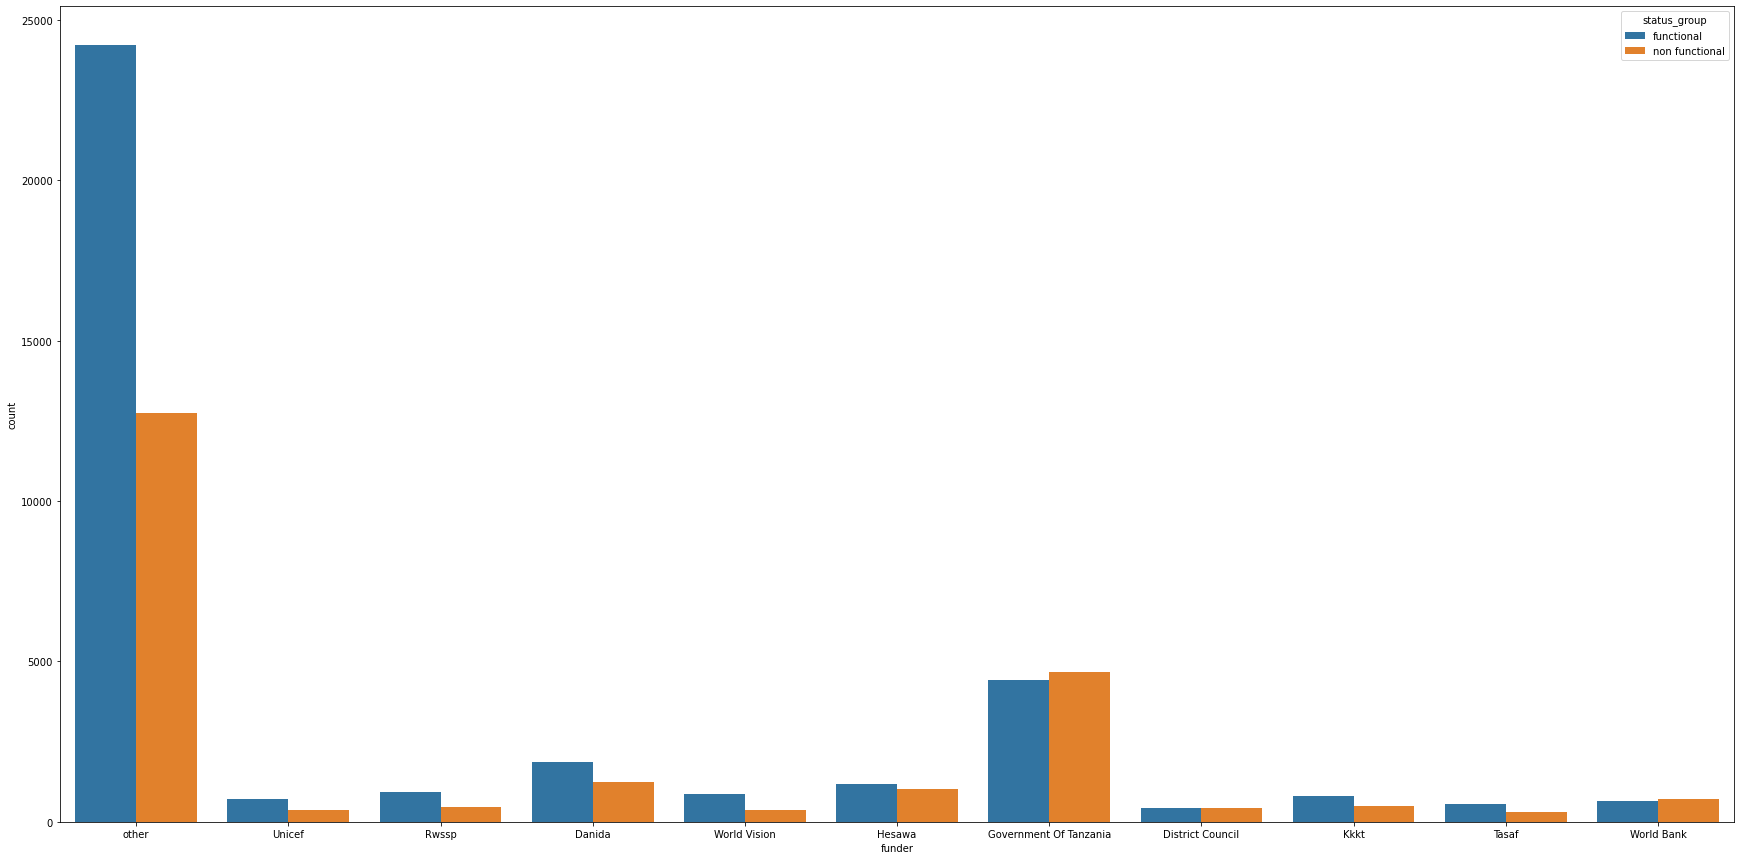

In [72]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x = 'funder', hue = 'status_group', data = data)

Wells funded by Government of Tanzania and World Bank show to have more non functional than functional. 

In [73]:
data.installer.value_counts()

DWE                    17402
Government              1825
RWE                     1206
Commu                   1060
DANIDA                  1050
                       ...  
Church Of Disciples        1
ISSAC MOLLEl               1
ACTION AID                 1
germany                    1
DIMON                      1
Name: installer, Length: 2145, dtype: int64

Some values are similar, but are recorded as upper and lower case.

In [74]:
data.installer.str.lower().value_counts()

dwe             17405
government       1891
hesawa           1395
rwe              1206
commu            1065
                ...  
missionaries        1
tcrs/ twesa         1
africa m            1
adam kea            1
morovian            1
Name: installer, Length: 1935, dtype: int64

Changing all values to lower case reduced the number of unique values from 2145 to 1935.

In [75]:
data.installer = data.installer.str.lower()

In [76]:
data.installer.value_counts().head(10)

dwe                   17405
government             1891
hesawa                 1395
rwe                    1206
commu                  1065
danida                 1050
district council        961
kkkt                    910
0                       777
central government      763
Name: installer, dtype: int64

In [77]:
data.loc[data.installer == '0', 'installer'] = 'other'

In [78]:
data.installer.value_counts().head(10)

dwe                   17405
government             1891
hesawa                 1395
rwe                    1206
commu                  1065
danida                 1050
district council        961
kkkt                    910
other                   777
central government      763
Name: installer, dtype: int64

In [79]:
installer_top10 = data.installer.value_counts().head(10).index

In [80]:
data.loc[~data.installer.isin(installer_top10), 'installer'] = 'other'

In [81]:
data.installer.value_counts()

other                 32754
dwe                   17405
government             1891
hesawa                 1395
rwe                    1206
commu                  1065
danida                 1050
district council        961
kkkt                    910
central government      763
Name: installer, dtype: int64

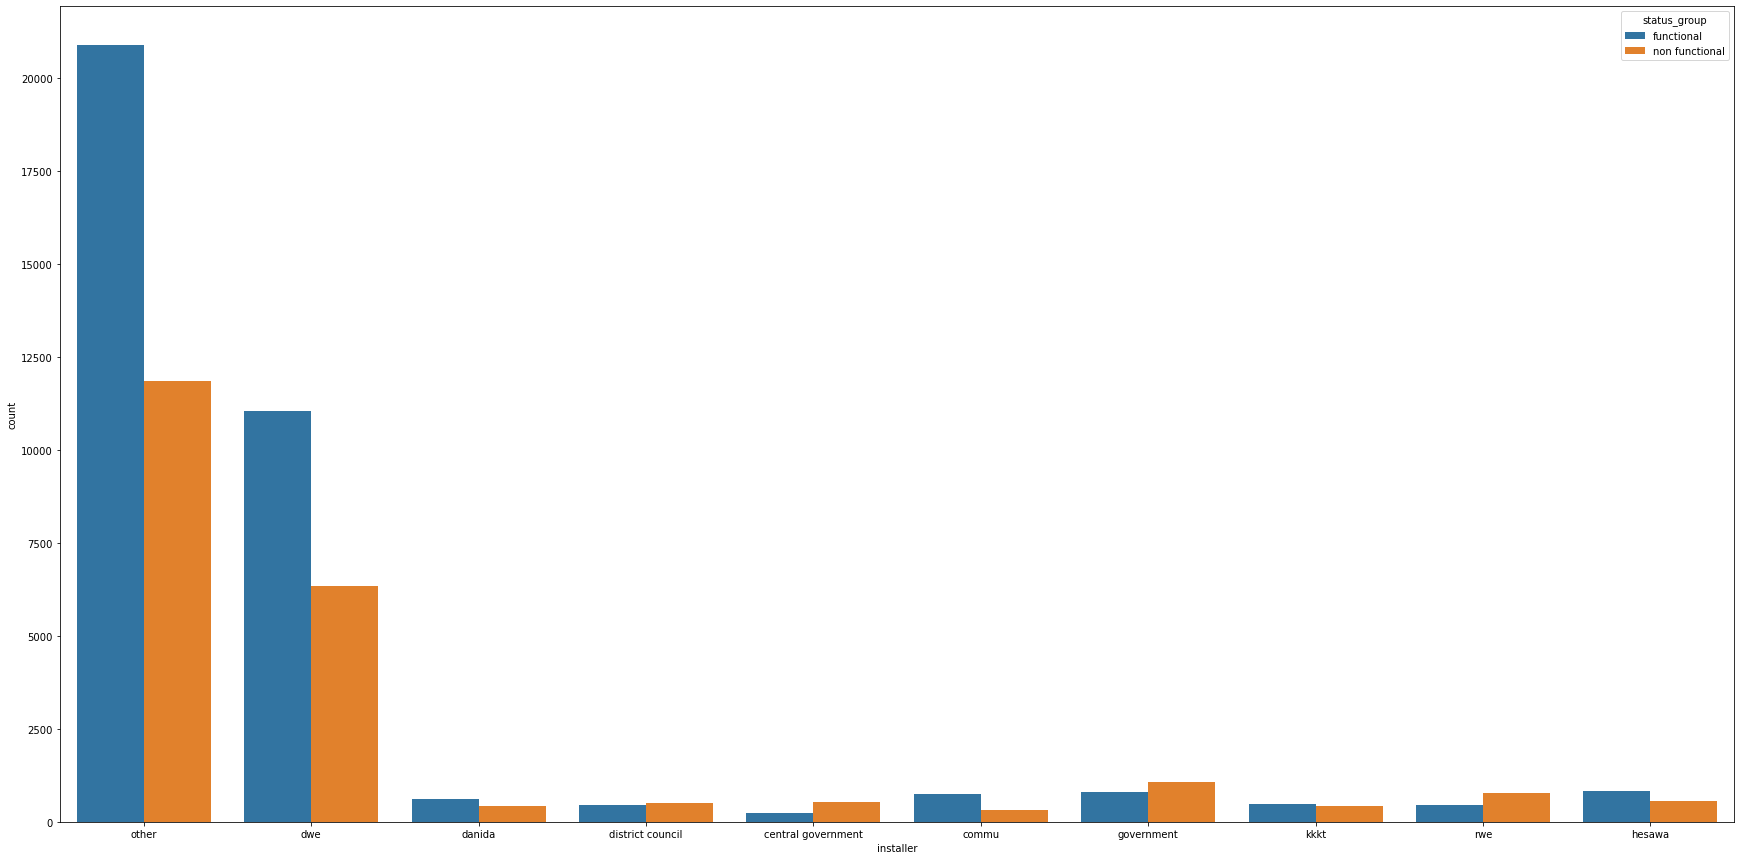

In [82]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x = 'installer', hue = 'status_group', data = data)

Graph shows a few installers have more non functional wells than functional wells.

gps height feature does not seem to provide any additional information on whether wells are functional or non functional. Distribution of values is similar when comparing between functional and non functional status. This feature can be dropped.

* gps_height - Altitude of the well

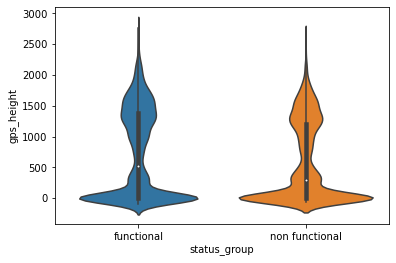

In [83]:
sns.violinplot(x = 'status_group', y = 'gps_height', data = data);

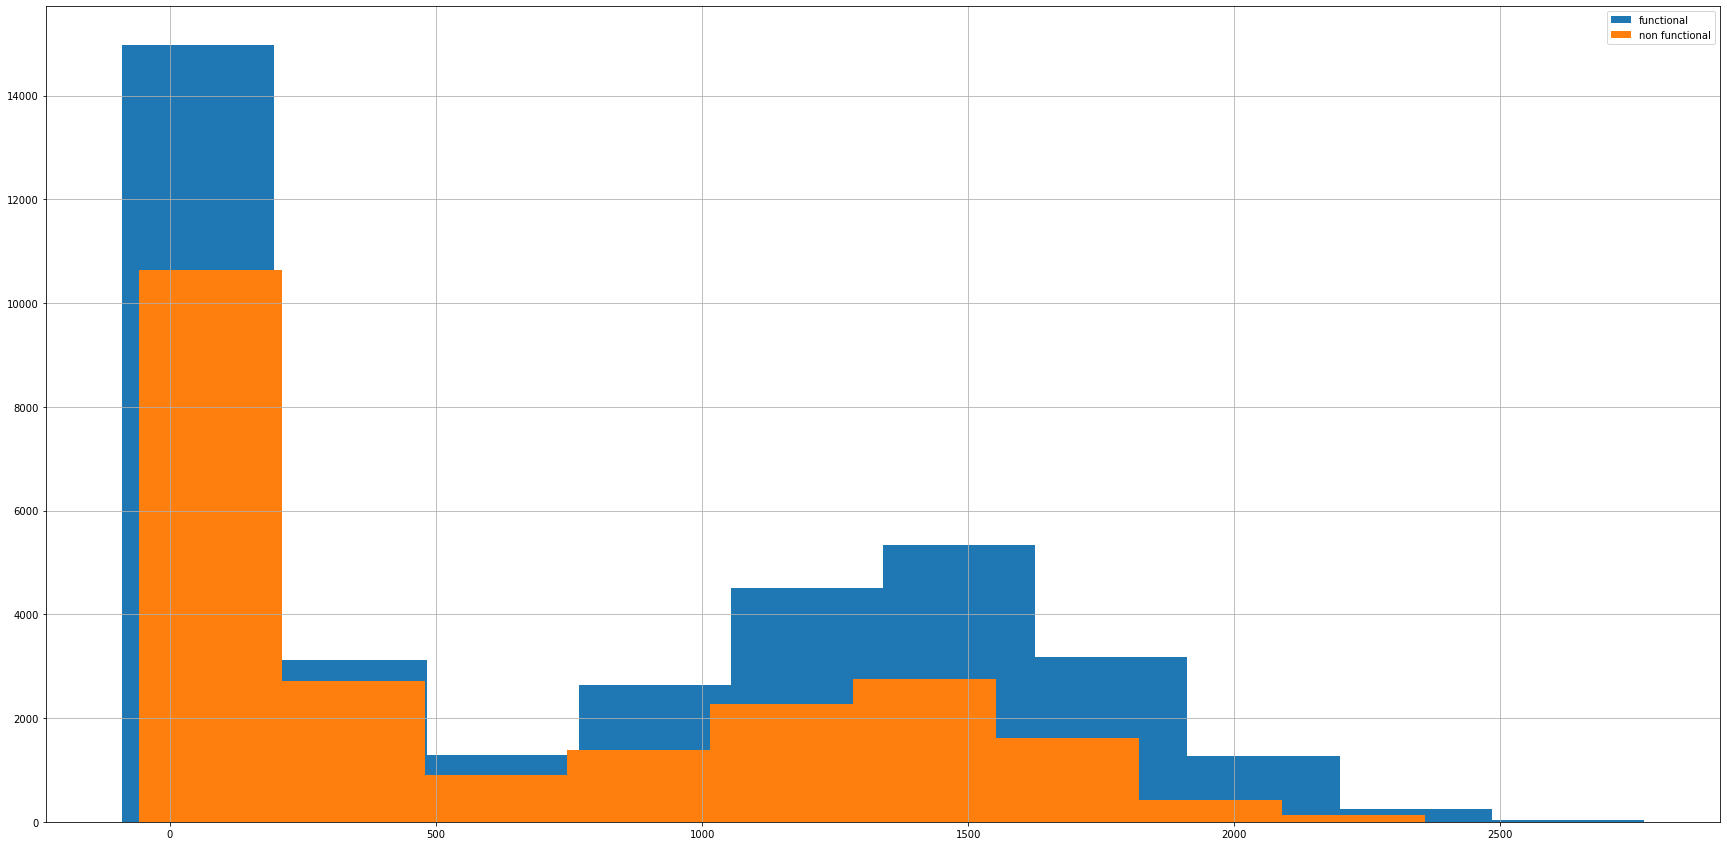

In [84]:
plt.figure(figsize=(30,15))
ax = data.groupby('status_group')['gps_height'].hist(legend = True)


In [85]:
data.gps_height.describe()

count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64

In [86]:
to_drop.append('gps_height')

There is around 36% of 0 values for the population feature. There are also many single digit values, around 12% of the waterpoints have a population of 1 listed. Since there is no information on how this feature was recorded (proximity of people to waterpoint), we can consider binning the values in certain intervals. 

* population - Population around the well

In [87]:
data.population.value_counts(normalize = True)

0       0.359949
1       0.118266
200     0.032660
150     0.031852
250     0.028300
          ...   
3241    0.000017
1960    0.000017
1685    0.000017
2248    0.000017
1439    0.000017
Name: population, Length: 1049, dtype: float64

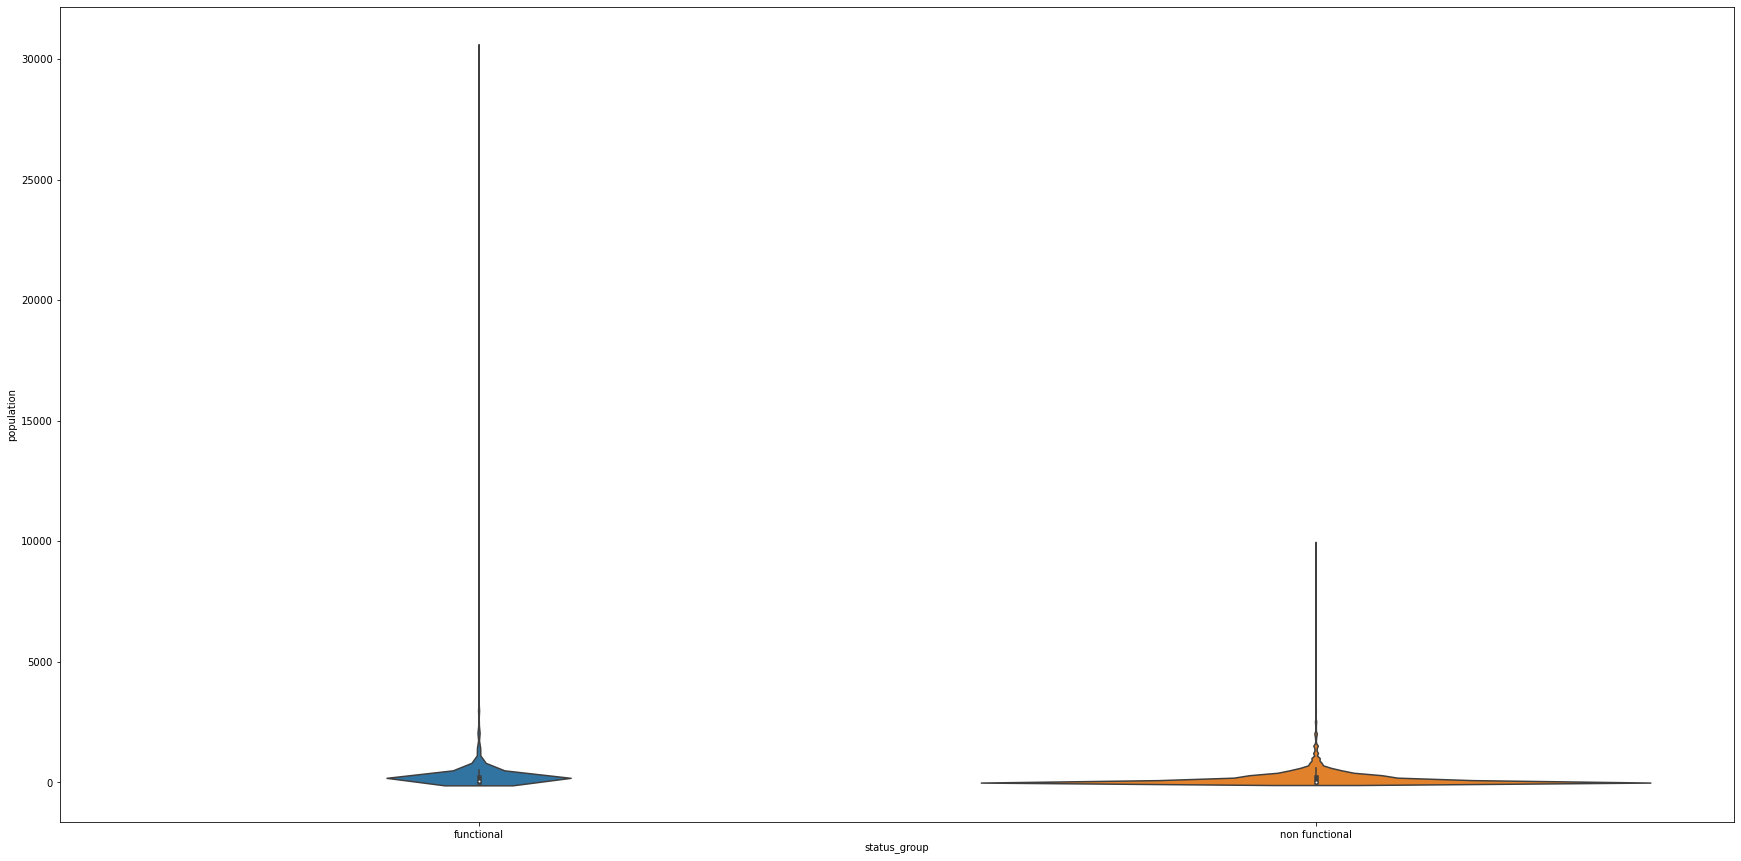

In [88]:
plt.figure(figsize=(30,15))
ax = sns.violinplot(x = 'status_group', y = 'population', data = data);

From above graph we can see that after a certain amount of population, there are more functional waterpoints than non functional. 

In [89]:
data[data.population > 0]['population'].describe()

count    38019.000000
mean       281.087167
std        564.687660
min          1.000000
25%         40.000000
50%        150.000000
75%        324.000000
max      30500.000000
Name: population, dtype: float64

In [90]:
# bin values with 0 to none and quartiles for values above 0
data['pop_bins'] = pd.cut(data.population, bins = [0, 1, 40, 150, 324, 30500], labels = ['none', 'low', 'below_average', 'above_average', 'high'], include_lowest = True)

In [91]:
data.pop_bins.value_counts()

none             28406
below_average     9978
high              9492
above_average     8595
low               2929
Name: pop_bins, dtype: int64

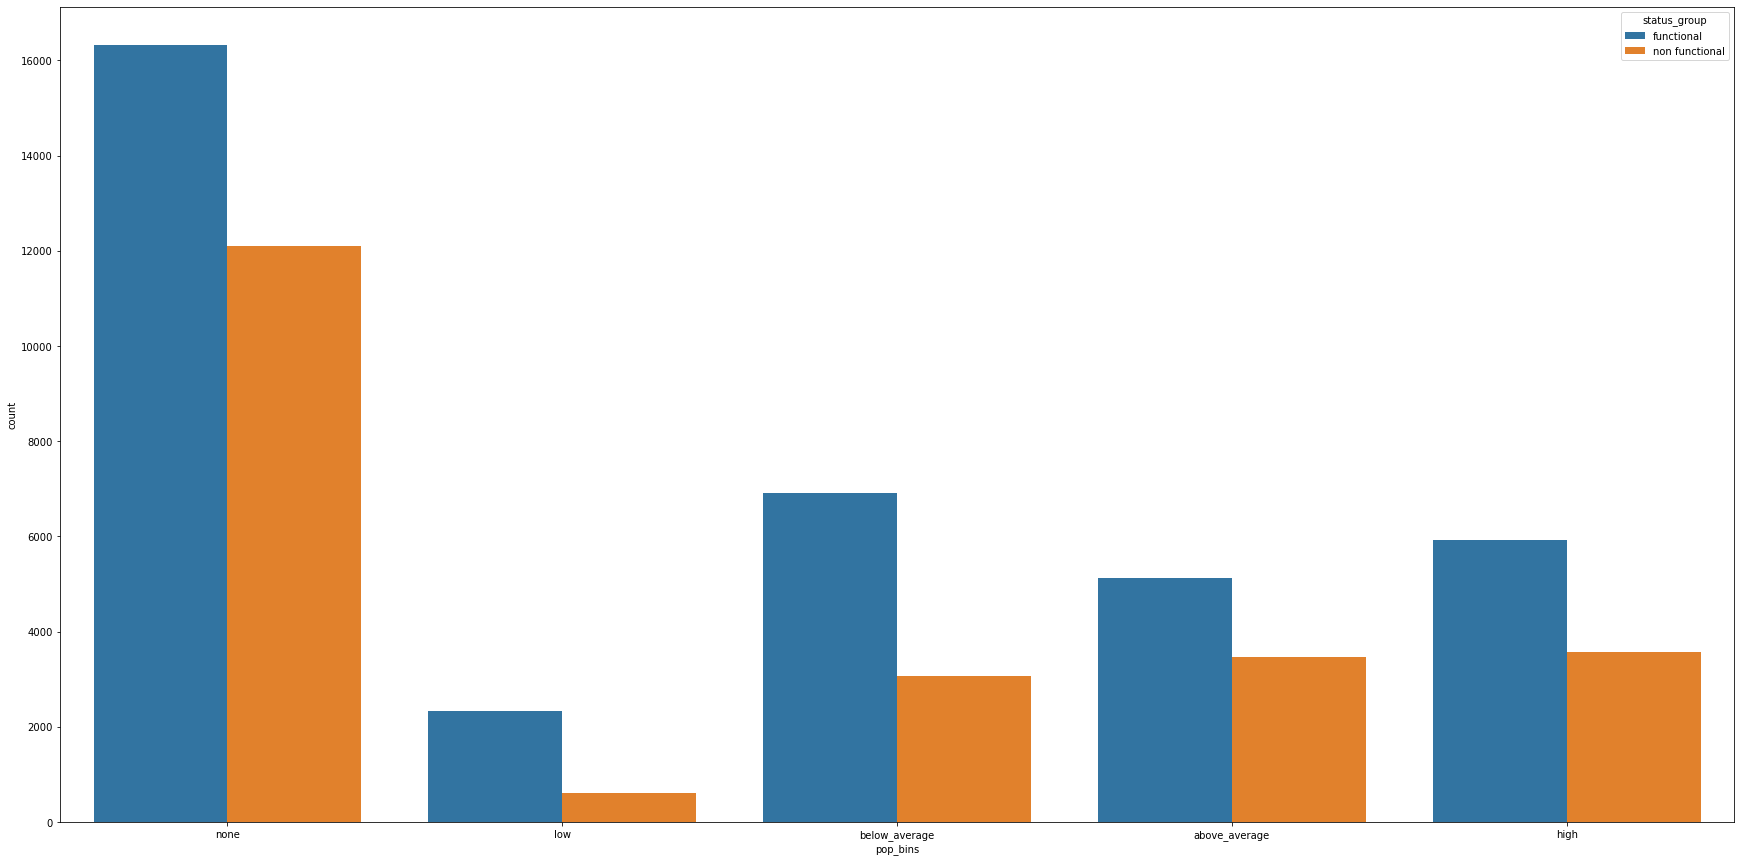

In [92]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x = 'pop_bins', hue = 'status_group', data = data)

Ratio of function to non functional increases from 0 to low population.

In [93]:
data.groupby(['pop_bins', 'status_group']).count()

id  amount_tsh  date_recorded  funder  \
pop_bins      status_group                                               
none          functional      16314       16314          16314   16314   
              non functional  12092       12092          12092   12092   
low           functional       2323        2323           2323    2323   
              non functional    606         606            606     606   
below_average functional       6901        6901           6901    6901   
              non functional   3077        3077           3077    3077   
above_average functional       5119        5119           5119    5119   
              non functional   3476        3476           3476    3476   
high          functional       5919        5919           5919    5919   
              non functional   3573        3573           3573    3573   

                              gps_height  installer  longitude  latitude  \
pop_bins      status_group                                                 
none          functional           16314      16314      16314     16314   
              non functional       12092      12092      12092     12092   
low           functional            2323       2323       2323      2323   
              non functional         606        606        606       606   
below_average functional            6901       6901       6901      6901   
              non functional        3077       3077       3077      3077   
above_average functional            5119       5119       5119      5119   
              non functional        3476       3476       3476      3476   
high          functional            5919       5919       5919      5919   
              non functional        3573       3573       3573      3573   

                              wpt_name  num_private  ...  payment_type  \
pop_bins      status_group                           ...                 
none          functional         16314        16314  ...         16314   
              non functional     12092        12092  ...         12092   
low           functional          2323         2323  ...          2323   
              non functional       606          606  ...           606   
below_average functional          6901         6901  ...          6901   
              non functional      3077         3077  ...          3077   
above_average functional          5119         5119  ...          5119   
              non functional      3476         3476  ...          3476   
high          functional          5919         5919  ...          5919   
              non functional      3573         3573  ...          3573   

                              water_quality  quality_group  quantity  \
pop_bins      status_group                                             
none          functional              16314          16314     16314   
              non functional          12092          12092     12092   
low           functional               2323           2323      2323   
              non functional            606            606       606   
below_average functional               6901           6901      6901   
              non functional           3077           3077      3077   
above_average functional               5119           5119      5119   
              non functional           3476           3476      3476   
high          functional               5919           5919      5919   
              non functional           3573           3573      3573   

                              quantity_group  source  source_type  \
pop_bins      status_group                                          
none          functional               16314   16314        16314   
              non functional           12092   12092        12092   
low           functional                2323    2323         2323   
              non functional             606     606          606   
below_average functional                6901    6901         69

In [94]:
to_drop.append('population')

construction_year contains around 35% of 0 values. We will bin the values to 10 year intervals, with 0 values listed as unknown.

* construction_year - Year the waterpoint was constructed

In [95]:
data.construction_year.value_counts(normalize = True)

0       0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
2007    0.026717
2006    0.024764
2003    0.021650
2011    0.021145
2004    0.018906
2012    0.018249
2002    0.018098
1978    0.017458
1995    0.017071
2005    0.017020
1999    0.016481
1998    0.016263
1990    0.016061
1985    0.015909
1980    0.013653
1996    0.013653
1984    0.013114
1982    0.012525
1994    0.012424
1972    0.011919
1974    0.011380
1997    0.010842
1992    0.010774
1993    0.010236
2001    0.009091
1988    0.008771
1983    0.008215
1975    0.007357
1986    0.007306
1976    0.006970
1970    0.006919
1991    0.005455
1989    0.005320
1987    0.005084
1981    0.004007
1977    0.003401
1979    0.003232
1973    0.003098
2013    0.002963
1971    0.002441
1960    0.001717
1967    0.001481
1963    0.001431
1968    0.001296
1969    0.000993
1964    0.000673
1962    0.000505
1961    0.000354
1965    0.000320
1966    0.000286
Name: construction_year, dtype: float64

In [96]:
construct_df = data[data.construction_year > 0]

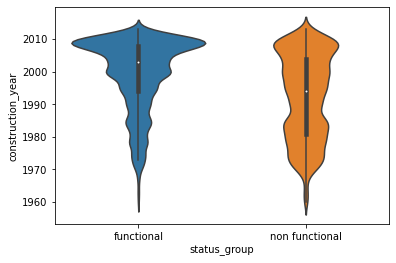

In [97]:
sns.violinplot(x = 'status_group', y = 'construction_year', data = construct_df);

In [98]:
construct_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000
mean,37083.008736,0.448528,1002.367760,35.983262,-6.235372,0.707710,15.706495,5.969786,269.799617,1996.814686
std,21420.922010,0.497350,618.078669,2.558709,2.761317,15.083957,21.003006,10.700673,552.343746,12.472045
min,1.000000,0.000000,-63.000000,29.607122,-11.649440,0.000000,2.000000,1.000000,0.000000,1960.000000
25%,18489.500000,0.000000,372.000000,34.676719,-8.755274,0.000000,4.000000,2.000000,30.000000,1987.000000
50%,37078.000000,0.000000,1154.000000,36.648187,-6.064216,0.000000,11.000000,3.000000,150.000000,2000.000000
75%,55514.500000,1.000000,1488.000000,37.803940,-3.650661,0.000000,16.000000,5.000000,305.000000,2008.000000
max,74247.000000,1.000000,2770.000000,40.345193,-1.042375,1776.000000,99.000000,63.000000,30500.000000,2013.000000


In [99]:
data['construct_bins'] = pd.cut(data.construction_year, bins = [-1, 1959, 1969, 1979, 1989, 1999, 2009, 2014], labels = ['unknown', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])

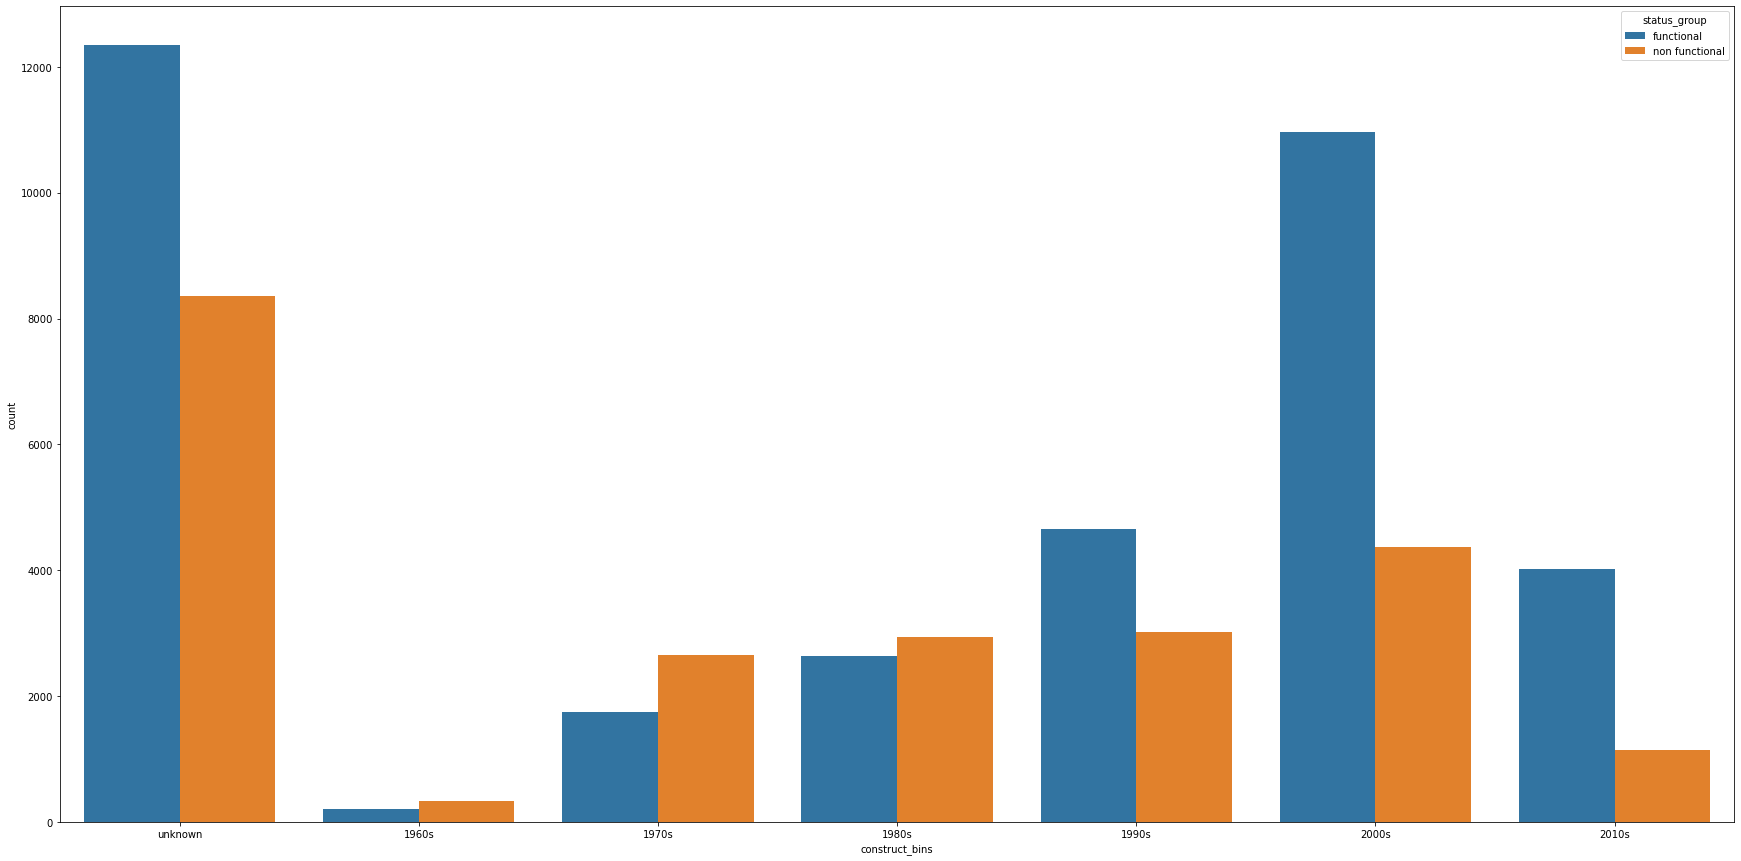

In [100]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x = 'construct_bins', hue = 'status_group', data = data)

In [101]:
to_drop.append('construction_year')

From the above graph, we can see older wells have more non functional than functional statuses.

Boolean Features, filling null values with most common values.

* public_meeting - True/False
* permit - If the waterpoint is permitted

In [102]:
data.public_meeting.isnull().sum()

3334

In [103]:
data.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [104]:
data.public_meeting.fillna(True, inplace = True)

In [105]:
data.public_meeting.value_counts()

True     54345
False     5055
Name: public_meeting, dtype: int64

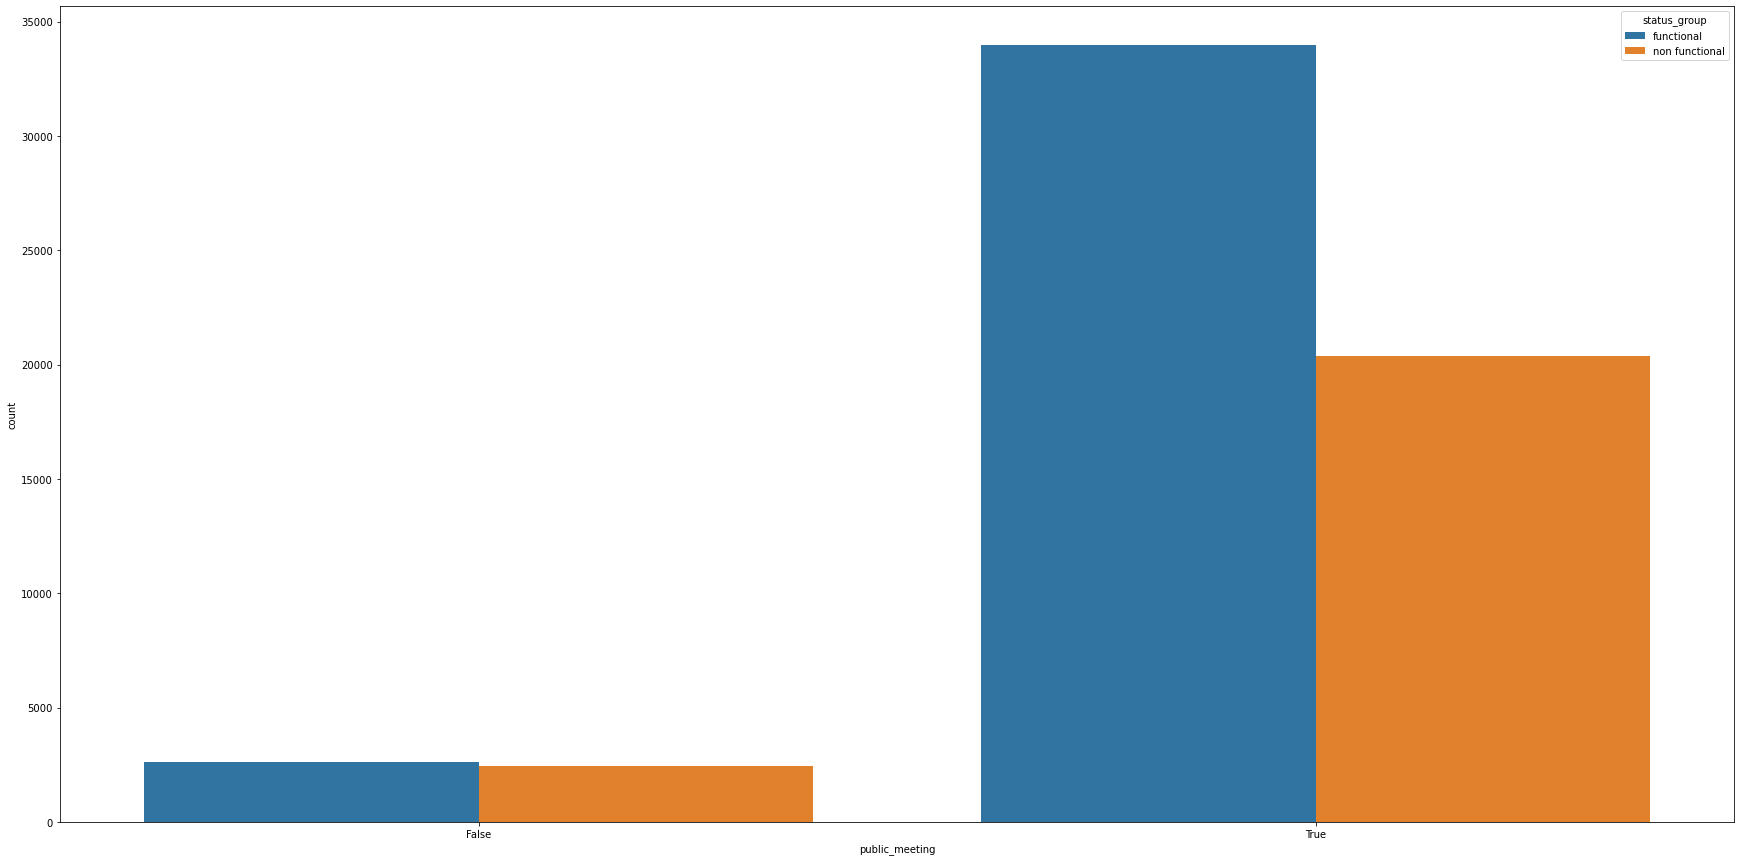

In [106]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x = 'public_meeting', hue = 'status_group', data = data)

Data shows when public meeting is true there are more functional wells than non functional.

In [107]:
data.permit.isnull().sum()

3056

In [108]:
data.permit.value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [109]:
data.permit.fillna(True, inplace = True)

In [110]:
data.permit.value_counts()

True     41908
False    17492
Name: permit, dtype: int64

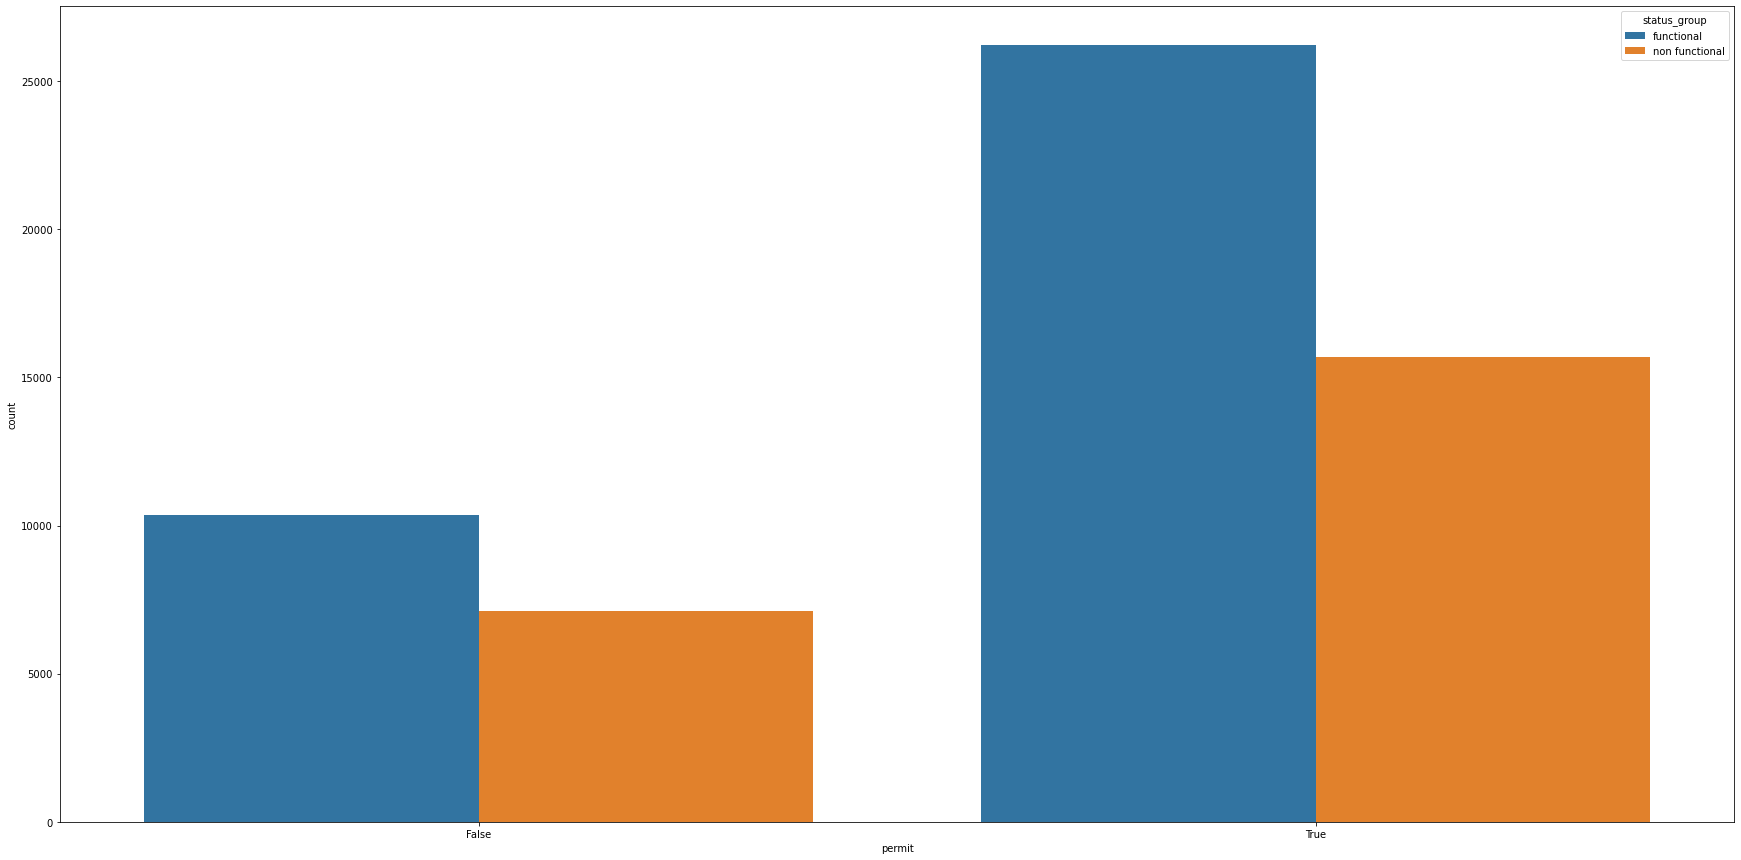

In [111]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x = 'permit', hue = 'status_group', data = data)

Data shows permit is true there are more functional wells than non functional.

Basin feature shows wells with Ruvuma values have more non functional wells than functional.

* basin - Geographic water basin

In [112]:
data.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

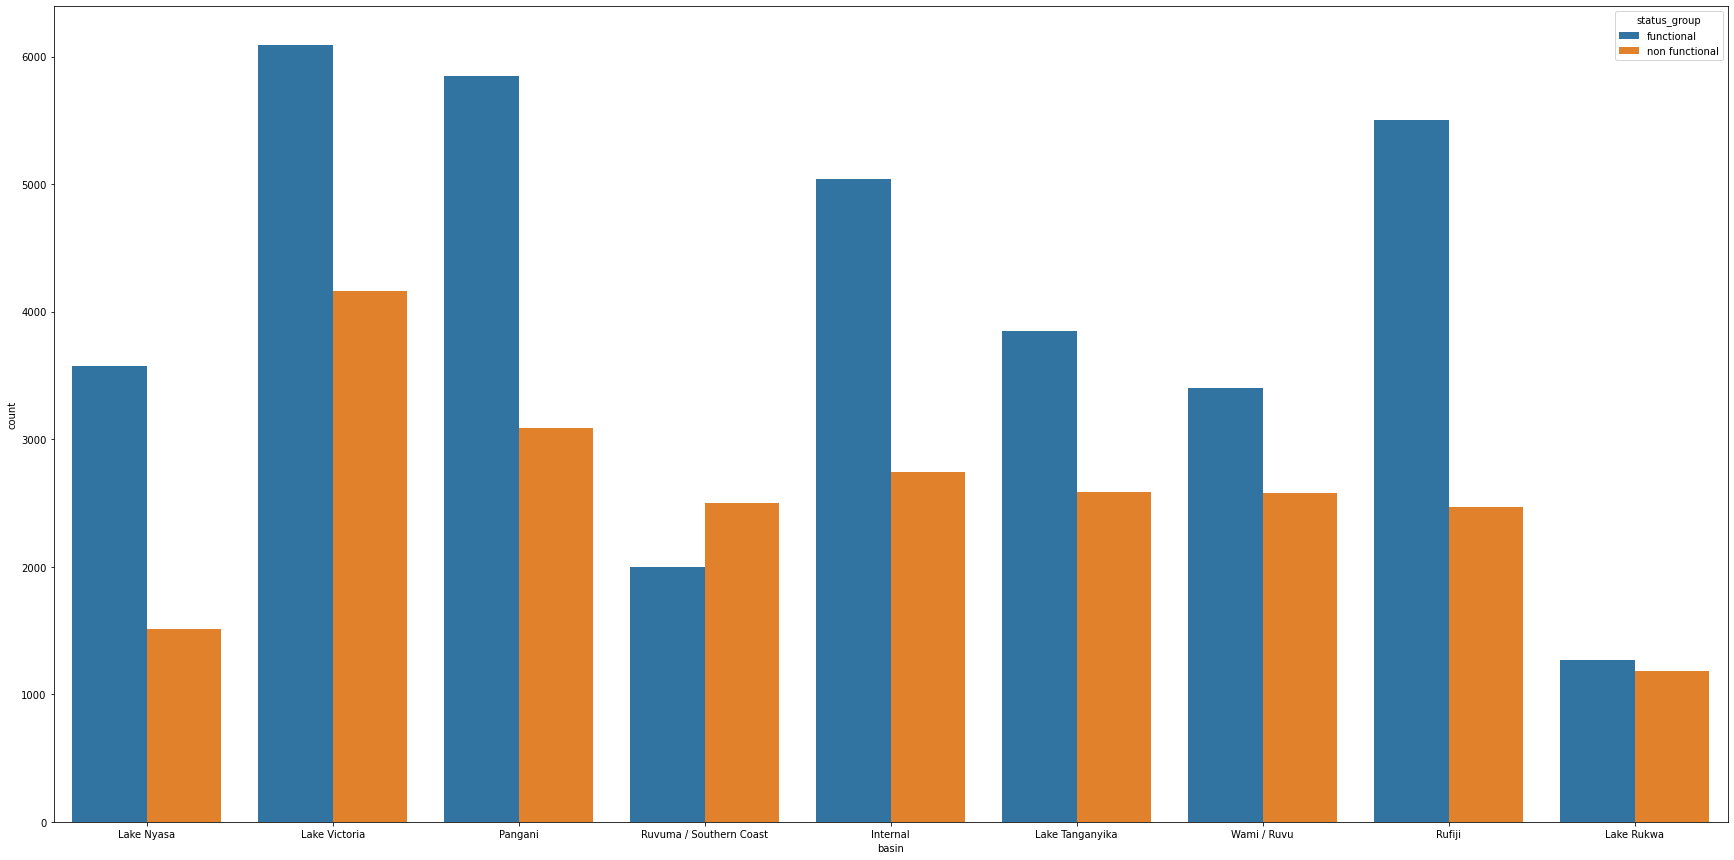

In [113]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x = 'basin', hue = 'status_group', data = data)

Remaining features do not provide any information that we will need and can be dropped.

* wpt_name - Name of the waterpoint if there is one (as expected high number of unique values)
* num_private - (no description and values are around 99% 0) 
* recorded_by - Group entering this row of data (only 1 value for all records)

In [114]:
data.recorded_by.value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [115]:
data.wpt_name.value_counts()

none                3563
Shuleni             1748
Zahanati             830
Msikitini            535
Kanisani             323
                    ... 
Lwabitende             1
Kwa Kiduga             1
Kwa Bugumba            1
Iponyamakulu           1
Shuleni Igoji Ii       1
Name: wpt_name, Length: 37400, dtype: int64

In [116]:
data.num_private.value_counts(normalize = True)

0      0.987256
6      0.001364
1      0.001229
5      0.000774
8      0.000774
         ...   
180    0.000017
213    0.000017
23     0.000017
55     0.000017
94     0.000017
Name: num_private, Length: 65, dtype: float64

In [117]:
to_drop.extend(['recorded_by', 'wpt_name', 'num_private', 'id', 'date_recorded', 'longitude', 'latitude'])

In [118]:
data.drop(to_drop, axis = 1, inplace = True)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   amount_tsh             59400 non-null  float64 
 1   funder                 59400 non-null  object  
 2   installer              59400 non-null  object  
 3   basin                  59400 non-null  object  
 4   district_code          59400 non-null  int64   
 5   lga                    59400 non-null  object  
 6   public_meeting         59400 non-null  bool    
 7   permit                 59400 non-null  bool    
 8   extraction_type_group  59400 non-null  object  
 9   management             59400 non-null  object  
 10  payment                59400 non-null  object  
 11  quality_group          59400 non-null  object  
 12  quantity               59400 non-null  object  
 13  source_type            59400 non-null  object  
 14  waterpoint_type        59400 non-null 

In [120]:
data.isnull().sum()

amount_tsh               0
funder                   0
installer                0
basin                    0
district_code            0
lga                      0
public_meeting           0
permit                   0
extraction_type_group    0
management               0
payment                  0
quality_group            0
quantity                 0
source_type              0
waterpoint_type          0
status_group             0
pop_bins                 0
construct_bins           0
dtype: int64

In [121]:
data.to_csv('Data/cleaned_df.csv', index = False)